In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
df = pd.read_csv('letter-recognition.data',header=None)

train_df = df[:1600]
test_df = df[16000:16000+400]

X = train_df.ix[:,1:16].to_numpy() 
y = np.array([ord(l)-ord('A') for l in train_df.ix[:,0].to_numpy()])

testX = test_df.ix[:,1:16].to_numpy() 
testy = np.array([ord(l)-ord('A') for l in test_df.ix[:,0].to_numpy()])

In [5]:
def get_winner(class1):
    
    numbers = [*range(26)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1600
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-letter2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random

number_codes = []
for i in range(2**(26-1), 2**26-1):
    if (i % 1000000) == 0:
            print(i)
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
        


number_codes = np.array(number_codes).reshape(2**(26 - 1) - 1,26).T     

slice = random.sample(range(2**(26 - 1) - 1), necoc)

number_codes = number_codes[:,slice].tolist()

classes = []
for i in range(necoc):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

matrix_errors = []

for i in range(25):
    for j in range(i+1,26):
        matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
min_error = np.min(matrix_errors)

print(min_error)

34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
49000000
50000000
51000000
52000000
53000000
54000000
55000000
56000000
57000000
58000000
59000000
60000000
61000000
62000000
63000000
64000000
65000000
66000000
67000000
37


In [7]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/30".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/30
number of class1:677
number of class2:923

 ****** Running generation 0 ****** 

Population's average fitness: 0.51539 stdev: 0.07158
Best fitness: 0.65625 - size: (2, 3) - species 4 - id 121
Average adjusted fitness: 0.127
Mean genetic distance 2.622, standard deviation 0.464
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 3.421 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53201 stdev: 0.07123
Best fitness: 0.65625 - size: (2, 3) - species 4 - id 121
Average adjusted fitness: 0.164
Mean genetic distance 2.643, standard deviation 0.485
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 3.209 sec (3.315 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53117 stdev: 0.07696
Best fitness: 0.65625 - size: (2, 3) - species 4 - id 121
Average adjusted fitness: 0.173
Mean genetic distance 2.750, standard deviation 0.527
Population of 200 members in 20 species
Total

Population's average fitness: 0.56152 stdev: 0.07593
Best fitness: 0.66938 - size: (6, 13) - species 30 - id 2772
Average adjusted fitness: 0.178
Mean genetic distance 3.203, standard deviation 0.551
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 4.756 sec (4.677 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.56578 stdev: 0.07696
Best fitness: 0.66938 - size: (6, 13) - species 30 - id 2772
Average adjusted fitness: 0.168
Mean genetic distance 3.182, standard deviation 0.570
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 4.352 sec (4.587 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.57036 stdev: 0.07296
Best fitness: 0.66938 - size: (6, 13) - species 30 - id 2772
Average adjusted fitness: 0.189
Mean genetic distance 3.187, standard deviation 0.573
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 4.539 sec (4.579 average)

 ******

Population's average fitness: 0.58040 stdev: 0.10860
Best fitness: 0.69937 - size: (2, 4) - species 30 - id 1423
Average adjusted fitness: 0.223
Mean genetic distance 3.026, standard deviation 0.553
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.402 sec (4.261 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.57552 stdev: 0.11517
Best fitness: 0.70875 - size: (6, 12) - species 5 - id 2923
Average adjusted fitness: 0.225
Mean genetic distance 2.996, standard deviation 0.534
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.987 sec (4.353 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.58326 stdev: 0.10660
Best fitness: 0.70875 - size: (6, 12) - species 5 - id 2923
Average adjusted fitness: 0.212
Mean genetic distance 3.000, standard deviation 0.541
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 3.993 sec (4.350 average)

 ****** Ru

Population's average fitness: 0.56062 stdev: 0.07224
Best fitness: 0.71000 - size: (5, 9) - species 8 - id 2002
Average adjusted fitness: 0.175
Mean genetic distance 3.171, standard deviation 0.528
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 4.759 sec (4.222 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56000 stdev: 0.07743
Best fitness: 0.71000 - size: (5, 9) - species 8 - id 2002
Average adjusted fitness: 0.155
Mean genetic distance 3.191, standard deviation 0.516
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.209 sec (4.296 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55614 stdev: 0.08002
Best fitness: 0.71000 - size: (5, 9) - species 8 - id 2002
Average adjusted fitness: 0.186
Mean genetic distance 3.184, standard deviation 0.522
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 4.189 sec (4.343 average)

 ****** Runni

Population's average fitness: 0.55312 stdev: 0.06515
Best fitness: 0.63687 - size: (5, 9) - species 14 - id 1192
Average adjusted fitness: 0.164
Mean genetic distance 3.046, standard deviation 0.500
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 3.976 sec (3.241 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55550 stdev: 0.06502
Best fitness: 0.63687 - size: (5, 9) - species 14 - id 1192
Average adjusted fitness: 0.144
Mean genetic distance 3.109, standard deviation 0.485
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 3.926 sec (3.327 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55936 stdev: 0.06211
Best fitness: 0.63687 - size: (5, 9) - species 14 - id 1192
Average adjusted fitness: 0.157
Mean genetic distance 3.072, standard deviation 0.505
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 4.060 sec (3.408 average)

 ****** Runn

Population's average fitness: 0.49199 stdev: 0.11191
Best fitness: 0.63813 - size: (2, 3) - species 4 - id 66
Average adjusted fitness: 0.154
Mean genetic distance 2.793, standard deviation 0.549
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 2.450 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53484 stdev: 0.11082
Best fitness: 0.68750 - size: (2, 3) - species 3 - id 201
Average adjusted fitness: 0.190
Mean genetic distance 2.933, standard deviation 0.547
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 2.749 sec (2.599 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55667 stdev: 0.10677
Best fitness: 0.68750 - size: (2, 3) - species 3 - id 201
Average adjusted fitness: 0.209
Mean genetic distance 2.991, standard deviation 0.559
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 3.235 sec (2.811 average)

 ****** Running generation 3 ******

Mean genetic distance 3.014, standard deviation 0.542
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.629 sec (4.995 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.56736 stdev: 0.10754
Best fitness: 0.71125 - size: (3, 5) - species 14 - id 1864
Average adjusted fitness: 0.240
Mean genetic distance 2.997, standard deviation 0.542
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.110 sec (5.232 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.56854 stdev: 0.10771
Best fitness: 0.71125 - size: (3, 5) - species 14 - id 1864
Average adjusted fitness: 0.204
Mean genetic distance 3.017, standard deviation 0.534
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 5.597 sec (5.286 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.57684 stdev: 0.10508
Best fitness: 0.71125 - size: (3, 5) - species 14 - id 1864
Ave

Population's average fitness: 0.62132 stdev: 0.14219
Best fitness: 0.77938 - size: (5, 12) - species 11 - id 2372
Average adjusted fitness: 0.340
Mean genetic distance 3.184, standard deviation 0.501
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 5.574 sec (4.894 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62720 stdev: 0.13737
Best fitness: 0.77938 - size: (5, 12) - species 11 - id 2372
Average adjusted fitness: 0.288
Mean genetic distance 3.184, standard deviation 0.505
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 5.449 sec (4.967 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60620 stdev: 0.15337
Best fitness: 0.77938 - size: (5, 12) - species 11 - id 2372
Average adjusted fitness: 0.368
Mean genetic distance 3.165, standard deviation 0.503
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 5.145 sec (5.013 average)

 ******

Population's average fitness: 0.56188 stdev: 0.08683
Best fitness: 0.66312 - size: (6, 11) - species 14 - id 1524
Average adjusted fitness: 0.168
Mean genetic distance 3.096, standard deviation 0.548
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.931 sec (4.567 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55415 stdev: 0.09232
Best fitness: 0.66312 - size: (6, 11) - species 14 - id 1524
Average adjusted fitness: 0.167
Mean genetic distance 3.076, standard deviation 0.544
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.747 sec (4.683 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.56108 stdev: 0.08756
Best fitness: 0.66312 - size: (6, 11) - species 14 - id 1524
Average adjusted fitness: 0.173
Mean genetic distance 3.080, standard deviation 0.521
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 5.407 sec (4.828 average)

 ******

Population's average fitness: 0.59296 stdev: 0.17033
Best fitness: 0.73813 - size: (3, 6) - species 9 - id 1255
Average adjusted fitness: 0.298
Mean genetic distance 2.959, standard deviation 0.550
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 3.932 sec (3.491 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58870 stdev: 0.17473
Best fitness: 0.73813 - size: (3, 6) - species 9 - id 1255
Average adjusted fitness: 0.296
Mean genetic distance 2.951, standard deviation 0.527
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 4.281 sec (3.578 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60034 stdev: 0.16475
Best fitness: 0.73813 - size: (3, 6) - species 8 - id 1255
Average adjusted fitness: 0.301
Mean genetic distance 2.954, standard deviation 0.516
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.535 sec (3.674 average)

 ****** Running

Population's average fitness: 0.53367 stdev: 0.08060
Best fitness: 0.62250 - size: (3, 4) - species 4 - id 327
Average adjusted fitness: 0.119
Mean genetic distance 2.703, standard deviation 0.516
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 2.684 sec (2.580 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53078 stdev: 0.08229
Best fitness: 0.62250 - size: (3, 4) - species 1 - id 327
Average adjusted fitness: 0.116
Mean genetic distance 2.620, standard deviation 0.490
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 2.913 sec (2.691 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53572 stdev: 0.08269
Best fitness: 0.62250 - size: (3, 4) - species 3 - id 327
Average adjusted fitness: 0.135
Mean genetic distance 2.723, standard deviation 0.496
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 3.169 sec (2.810 average)

 ****** Running ge

Population's average fitness: 0.54632 stdev: 0.08540
Best fitness: 0.67437 - size: (4, 9) - species 12 - id 1009
Average adjusted fitness: 0.146
Mean genetic distance 3.134, standard deviation 0.513
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.395 sec (4.495 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.54895 stdev: 0.08285
Best fitness: 0.67437 - size: (4, 9) - species 12 - id 1009
Average adjusted fitness: 0.172
Mean genetic distance 3.142, standard deviation 0.508
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 4.479 sec (4.536 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.55373 stdev: 0.08222
Best fitness: 0.67437 - size: (4, 9) - species 12 - id 1009
Average adjusted fitness: 0.159
Mean genetic distance 3.110, standard deviation 0.510
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 4.819 sec (4.616 average)

 ****** Ru

Population's average fitness: 0.54975 stdev: 0.07575
Best fitness: 0.70125 - size: (5, 9) - species 6 - id 1344
Average adjusted fitness: 0.184
Mean genetic distance 3.084, standard deviation 0.657
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 4.146 sec (4.015 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.54331 stdev: 0.07745
Best fitness: 0.70125 - size: (5, 9) - species 6 - id 1344
Average adjusted fitness: 0.175
Mean genetic distance 3.062, standard deviation 0.652
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.210 sec (4.050 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.54727 stdev: 0.07749
Best fitness: 0.70125 - size: (5, 9) - species 6 - id 1344
Average adjusted fitness: 0.147
Mean genetic distance 3.063, standard deviation 0.656
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.282 sec (4.104 average)

 ****** Runni

Population's average fitness: 0.55438 stdev: 0.06091
Best fitness: 0.67500 - size: (3, 6) - species 14 - id 1985
Average adjusted fitness: 0.119
Mean genetic distance 3.080, standard deviation 0.510
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 4.840 sec (4.328 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.55194 stdev: 0.06098
Best fitness: 0.67500 - size: (3, 6) - species 14 - id 1985
Average adjusted fitness: 0.141
Mean genetic distance 3.078, standard deviation 0.523
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 4.469 sec (4.442 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.54943 stdev: 0.06150
Best fitness: 0.67875 - size: (4, 8) - species 14 - id 2781
Average adjusted fitness: 0.132
Mean genetic distance 3.092, standard deviation 0.502
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 4.607 sec (4.562 average)

 ****** Ru

Population's average fitness: 0.56596 stdev: 0.09492
Best fitness: 0.68437 - size: (2, 3) - species 4 - id 1369
Average adjusted fitness: 0.209
Mean genetic distance 2.945, standard deviation 0.570
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 3.745 sec (3.550 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57187 stdev: 0.08944
Best fitness: 0.68437 - size: (2, 3) - species 4 - id 1369
Average adjusted fitness: 0.193
Mean genetic distance 2.990, standard deviation 0.577
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 4.032 sec (3.598 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56557 stdev: 0.09351
Best fitness: 0.68437 - size: (2, 3) - species 4 - id 1369
Average adjusted fitness: 0.200
Mean genetic distance 2.948, standard deviation 0.586
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.074 sec (3.759 average)

 ****** Runnin

Population's average fitness: 0.59701 stdev: 0.14921
Best fitness: 0.77187 - size: (3, 4) - species 6 - id 538
Average adjusted fitness: 0.355
Mean genetic distance 2.712, standard deviation 0.568
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 3.054 sec (2.837 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58799 stdev: 0.15652
Best fitness: 0.78500 - size: (4, 6) - species 6 - id 722
Average adjusted fitness: 0.292
Mean genetic distance 2.850, standard deviation 0.571
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 3.191 sec (2.926 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59380 stdev: 0.15419
Best fitness: 0.78500 - size: (4, 6) - species 2 - id 722
Average adjusted fitness: 0.302
Mean genetic distance 2.991, standard deviation 0.605
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 3.363 sec (3.013 average)

 ****** Running ge

Population's average fitness: 0.60548 stdev: 0.16463
Best fitness: 0.78500 - size: (4, 6) - species 2 - id 722
Average adjusted fitness: 0.281
Mean genetic distance 3.105, standard deviation 0.557
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 6.826 sec (6.207 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59378 stdev: 0.16709
Best fitness: 0.78500 - size: (4, 6) - species 2 - id 722
Average adjusted fitness: 0.365
Mean genetic distance 3.102, standard deviation 0.575
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 5.288 sec (6.094 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.60668 stdev: 0.16190
Best fitness: 0.78500 - size: (4, 6) - species 2 - id 722
Average adjusted fitness: 0.299
Mean genetic distance 3.144, standard deviation 0.560
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 4.964 sec (6.069 average)
running:13/30
num

Population's average fitness: 0.53666 stdev: 0.06171
Best fitness: 0.66125 - size: (8, 17) - species 26 - id 3016
Average adjusted fitness: 0.118
Mean genetic distance 3.084, standard deviation 0.512
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 4.345 sec (4.163 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.54374 stdev: 0.05886
Best fitness: 0.66125 - size: (8, 17) - species 26 - id 3016
Average adjusted fitness: 0.127
Mean genetic distance 3.085, standard deviation 0.518
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 4.175 sec (4.179 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.54517 stdev: 0.05781
Best fitness: 0.66125 - size: (8, 17) - species 26 - id 3016
Average adjusted fitness: 0.103
Mean genetic distance 3.045, standard deviation 0.533
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 4.167 sec (4.163 average)

 ******

Population's average fitness: 0.52668 stdev: 0.04384
Best fitness: 0.60750 - size: (3, 6) - species 5 - id 534
Average adjusted fitness: 0.129
Mean genetic distance 3.098, standard deviation 0.574
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 4.741 sec (4.372 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.52952 stdev: 0.04459
Best fitness: 0.60750 - size: (3, 6) - species 16 - id 534
Average adjusted fitness: 0.080
Mean genetic distance 3.042, standard deviation 0.579
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 4.971 sec (4.503 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.53307 stdev: 0.04341
Best fitness: 0.60750 - size: (3, 6) - species 5 - id 534
Average adjusted fitness: 0.077
Mean genetic distance 3.047, standard deviation 0.575
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.116 sec (4.547 average)

 ****** Running

Population's average fitness: 0.52680 stdev: 0.03523
Best fitness: 0.59937 - size: (4, 9) - species 33 - id 1594
Average adjusted fitness: 0.098
Mean genetic distance 3.129, standard deviation 0.521
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 3.947 sec (3.812 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.52858 stdev: 0.03162
Best fitness: 0.59937 - size: (4, 9) - species 33 - id 1594
Average adjusted fitness: 0.071
Mean genetic distance 3.142, standard deviation 0.517
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 3.923 sec (3.963 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.53073 stdev: 0.03211
Best fitness: 0.59937 - size: (4, 9) - species 33 - id 1594
Average adjusted fitness: 0.070
Mean genetic distance 3.172, standard deviation 0.523
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 3.859 sec (3.971 average)

 ****** Ru

Population's average fitness: 0.54549 stdev: 0.09139
Best fitness: 0.72937 - size: (2, 4) - species 3 - id 442
Average adjusted fitness: 0.189
Mean genetic distance 2.741, standard deviation 0.551
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.035 sec (4.171 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55049 stdev: 0.08994
Best fitness: 0.72937 - size: (2, 4) - species 3 - id 442
Average adjusted fitness: 0.242
Mean genetic distance 2.686, standard deviation 0.554
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.128 sec (4.162 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55653 stdev: 0.09377
Best fitness: 0.72937 - size: (2, 4) - species 3 - id 442
Average adjusted fitness: 0.231
Mean genetic distance 2.814, standard deviation 0.575
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.034 sec (4.141 average)

 ****** Running ge

Total extinctions: 0
Generation time: 5.419 sec (5.208 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.59645 stdev: 0.10260
Best fitness: 0.74813 - size: (7, 14) - species 9 - id 4083
Average adjusted fitness: 0.315
Mean genetic distance 3.122, standard deviation 0.535
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 5.374 sec (5.222 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59040 stdev: 0.11005
Best fitness: 0.74813 - size: (7, 14) - species 9 - id 4083
Average adjusted fitness: 0.305
Mean genetic distance 3.111, standard deviation 0.533
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 5.195 sec (5.263 average)
running:17/30
number of class1:893
number of class2:707

 ****** Running generation 0 ****** 

Population's average fitness: 0.49816 stdev: 0.05488
Best fitness: 0.61625 - size: (2, 3) - species 2 - id 87
Average adjusted fitness: 0.147
Mean genetic 

Population's average fitness: 0.55938 stdev: 0.07242
Best fitness: 0.70125 - size: (7, 13) - species 17 - id 3587
Average adjusted fitness: 0.140
Mean genetic distance 2.945, standard deviation 0.543
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.286 sec (6.264 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.56613 stdev: 0.07027
Best fitness: 0.70125 - size: (7, 13) - species 17 - id 3587
Average adjusted fitness: 0.135
Mean genetic distance 2.976, standard deviation 0.547
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 6.180 sec (6.378 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.56362 stdev: 0.06909
Best fitness: 0.70125 - size: (7, 13) - species 17 - id 3587
Average adjusted fitness: 0.120
Mean genetic distance 3.013, standard deviation 0.554
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.822 sec (6.389 average)

 ******

Population's average fitness: 0.53955 stdev: 0.04839
Best fitness: 0.65312 - size: (6, 9) - species 10 - id 2586
Average adjusted fitness: 0.107
Mean genetic distance 3.054, standard deviation 0.554
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 4.698 sec (4.700 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.54100 stdev: 0.04916
Best fitness: 0.65312 - size: (6, 9) - species 10 - id 2586
Average adjusted fitness: 0.110
Mean genetic distance 3.103, standard deviation 0.551
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 5.314 sec (4.804 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.53756 stdev: 0.04969
Best fitness: 0.65312 - size: (6, 9) - species 10 - id 2586
Average adjusted fitness: 0.124
Mean genetic distance 3.106, standard deviation 0.554
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 4.747 sec (4.825 average)

 ****** Ru

Generation time: 5.477 sec (3.826 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.52077 stdev: 0.03510
Best fitness: 0.60625 - size: (5, 8) - species 2 - id 1402
Average adjusted fitness: 0.089
Mean genetic distance 2.939, standard deviation 0.562
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 4.560 sec (4.016 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.52217 stdev: 0.03475
Best fitness: 0.60625 - size: (5, 8) - species 24 - id 1402
Average adjusted fitness: 0.084
Mean genetic distance 2.936, standard deviation 0.568
Population of 206 members in 24 species
Total extinctions: 0
Generation time: 4.312 sec (4.148 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.52450 stdev: 0.03539
Best fitness: 0.60625 - size: (5, 8) - species 24 - id 1402
Average adjusted fitness: 0.077
Mean genetic distance 2.922, standard deviation 0.575
Population of 206 members in 24 s

Population's average fitness: 0.50913 stdev: 0.02393
Best fitness: 0.57812 - size: (4, 8) - species 16 - id 795
Average adjusted fitness: 0.077
Mean genetic distance 2.953, standard deviation 0.567
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 3.731 sec (3.225 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.51398 stdev: 0.02330
Best fitness: 0.58062 - size: (5, 9) - species 16 - id 1065
Average adjusted fitness: 0.051
Mean genetic distance 2.917, standard deviation 0.563
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 3.839 sec (3.327 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.51447 stdev: 0.02526
Best fitness: 0.58875 - size: (4, 8) - species 11 - id 1129
Average adjusted fitness: 0.079
Mean genetic distance 2.937, standard deviation 0.558
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.039 sec (3.429 average)

 ****** Runni

Population's average fitness: 0.52762 stdev: 0.03465
Best fitness: 0.60875 - size: (7, 12) - species 24 - id 2979
Average adjusted fitness: 0.093
Mean genetic distance 3.215, standard deviation 0.556
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 5.247 sec (4.991 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.52618 stdev: 0.03421
Best fitness: 0.60875 - size: (7, 12) - species 24 - id 2979
Average adjusted fitness: 0.085
Mean genetic distance 3.232, standard deviation 0.559
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 5.198 sec (4.974 average)
running:21/30
number of class1:700
number of class2:900

 ****** Running generation 0 ****** 

Population's average fitness: 0.50527 stdev: 0.05681
Best fitness: 0.59813 - size: (2, 3) - species 1 - id 36
Average adjusted fitness: 0.094
Mean genetic distance 2.718, standard deviation 0.496
Population of 200 members in 14 species
Total extinctions: 0


Population's average fitness: 0.55488 stdev: 0.06392
Best fitness: 0.63250 - size: (5, 8) - species 10 - id 2063
Average adjusted fitness: 0.158
Mean genetic distance 3.100, standard deviation 0.609
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 4.113 sec (4.541 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.55083 stdev: 0.06252
Best fitness: 0.63250 - size: (5, 8) - species 10 - id 2063
Average adjusted fitness: 0.143
Mean genetic distance 3.119, standard deviation 0.596
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.453 sec (4.588 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.55012 stdev: 0.06611
Best fitness: 0.63250 - size: (5, 8) - species 10 - id 2063
Average adjusted fitness: 0.124
Mean genetic distance 3.222, standard deviation 0.595
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.524 sec (4.633 average)

 ****** Ru

Population's average fitness: 0.55548 stdev: 0.05465
Best fitness: 0.64250 - size: (6, 10) - species 13 - id 2153
Average adjusted fitness: 0.093
Mean genetic distance 3.059, standard deviation 0.527
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 3.956 sec (3.824 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.55828 stdev: 0.05650
Best fitness: 0.64250 - size: (6, 10) - species 13 - id 2153
Average adjusted fitness: 0.135
Mean genetic distance 3.057, standard deviation 0.540
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 4.077 sec (3.871 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.55424 stdev: 0.05635
Best fitness: 0.64250 - size: (6, 10) - species 13 - id 2153
Average adjusted fitness: 0.103
Mean genetic distance 3.059, standard deviation 0.540
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 4.084 sec (3.901 average)

 ******

Population's average fitness: 0.56470 stdev: 0.10637
Best fitness: 0.70188 - size: (2, 6) - species 15 - id 1668
Average adjusted fitness: 0.182
Mean genetic distance 2.983, standard deviation 0.556
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 3.807 sec (3.646 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57332 stdev: 0.10555
Best fitness: 0.70188 - size: (2, 6) - species 15 - id 1668
Average adjusted fitness: 0.207
Mean genetic distance 2.982, standard deviation 0.579
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 3.889 sec (3.749 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57548 stdev: 0.10342
Best fitness: 0.70437 - size: (3, 5) - species 12 - id 2116
Average adjusted fitness: 0.199
Mean genetic distance 2.994, standard deviation 0.575
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 3.618 sec (3.819 average)

 ****** Ru

Population's average fitness: 0.60924 stdev: 0.13270
Best fitness: 0.72000 - size: (2, 3) - species 12 - id 161
Average adjusted fitness: 0.280
Mean genetic distance 2.910, standard deviation 0.552
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 3.357 sec (2.945 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60171 stdev: 0.14098
Best fitness: 0.72000 - size: (2, 3) - species 12 - id 161
Average adjusted fitness: 0.283
Mean genetic distance 2.957, standard deviation 0.555
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.469 sec (3.199 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58816 stdev: 0.15038
Best fitness: 0.72000 - size: (2, 3) - species 19 - id 161
Average adjusted fitness: 0.283
Mean genetic distance 2.989, standard deviation 0.512
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 3.766 sec (3.280 average)

 ****** Running

Population's average fitness: 0.60234 stdev: 0.14637
Best fitness: 0.73000 - size: (3, 6) - species 13 - id 4033
Average adjusted fitness: 0.297
Mean genetic distance 3.026, standard deviation 0.610
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.616 sec (4.277 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62274 stdev: 0.12977
Best fitness: 0.73000 - size: (3, 6) - species 13 - id 4033
Average adjusted fitness: 0.310
Mean genetic distance 2.985, standard deviation 0.615
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.419 sec (4.305 average)
running:25/30
number of class1:913
number of class2:687

 ****** Running generation 0 ****** 

Population's average fitness: 0.49083 stdev: 0.06502
Best fitness: 0.60500 - size: (2, 3) - species 3 - id 81
Average adjusted fitness: 0.099
Mean genetic distance 2.750, standard deviation 0.495
Population of 198 members in 14 species
Total extinctions: 0
Ge

Population's average fitness: 0.53802 stdev: 0.07191
Best fitness: 0.65875 - size: (3, 5) - species 9 - id 2148
Average adjusted fitness: 0.114
Mean genetic distance 3.254, standard deviation 0.541
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 4.117 sec (4.043 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.53869 stdev: 0.06888
Best fitness: 0.65875 - size: (3, 5) - species 9 - id 2148
Average adjusted fitness: 0.133
Mean genetic distance 3.292, standard deviation 0.582
Population of 206 members in 24 species
Total extinctions: 0
Generation time: 4.195 sec (4.060 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.53494 stdev: 0.07064
Best fitness: 0.65875 - size: (3, 5) - species 9 - id 2148
Average adjusted fitness: 0.117
Mean genetic distance 3.310, standard deviation 0.584
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 4.613 sec (4.132 average)

 ****** Runni

Population's average fitness: 0.53015 stdev: 0.04231
Best fitness: 0.61625 - size: (4, 7) - species 9 - id 1042
Average adjusted fitness: 0.084
Mean genetic distance 3.011, standard deviation 0.526
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 4.134 sec (3.903 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.53065 stdev: 0.04418
Best fitness: 0.61625 - size: (4, 7) - species 9 - id 1042
Average adjusted fitness: 0.087
Mean genetic distance 3.004, standard deviation 0.539
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 4.129 sec (3.958 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.53084 stdev: 0.04400
Best fitness: 0.61625 - size: (4, 7) - species 9 - id 1042
Average adjusted fitness: 0.083
Mean genetic distance 3.041, standard deviation 0.556
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 4.138 sec (3.983 average)

 ****** Runni

Population's average fitness: 0.64365 stdev: 0.21737
Best fitness: 0.79875 - size: (3, 6) - species 6 - id 1702
Average adjusted fitness: 0.394
Mean genetic distance 3.025, standard deviation 0.543
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 3.695 sec (3.403 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66575 stdev: 0.20016
Best fitness: 0.79875 - size: (3, 6) - species 6 - id 1702
Average adjusted fitness: 0.406
Mean genetic distance 3.024, standard deviation 0.548
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 3.671 sec (3.480 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63552 stdev: 0.21816
Best fitness: 0.79875 - size: (3, 6) - species 6 - id 1702
Average adjusted fitness: 0.398
Mean genetic distance 3.005, standard deviation 0.538
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 3.667 sec (3.533 average)

 ****** Runni

Population's average fitness: 0.52415 stdev: 0.06043
Best fitness: 0.66500 - size: (3, 5) - species 9 - id 910
Average adjusted fitness: 0.184
Mean genetic distance 2.804, standard deviation 0.527
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 3.290 sec (2.936 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53185 stdev: 0.05810
Best fitness: 0.67500 - size: (4, 8) - species 15 - id 1046
Average adjusted fitness: 0.126
Mean genetic distance 2.881, standard deviation 0.548
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 3.488 sec (3.028 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.52936 stdev: 0.06282
Best fitness: 0.67500 - size: (4, 8) - species 15 - id 1046
Average adjusted fitness: 0.127
Mean genetic distance 2.916, standard deviation 0.573
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 3.480 sec (3.093 average)

 ****** Runnin

Population's average fitness: 0.55043 stdev: 0.07599
Best fitness: 0.70250 - size: (6, 12) - species 25 - id 3877
Average adjusted fitness: 0.169
Mean genetic distance 3.108, standard deviation 0.539
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 4.912 sec (4.569 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.55837 stdev: 0.07483
Best fitness: 0.70250 - size: (6, 12) - species 25 - id 3877
Average adjusted fitness: 0.192
Mean genetic distance 3.098, standard deviation 0.543
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.763 sec (4.607 average)
running:29/30
number of class1:476
number of class2:1124

 ****** Running generation 0 ****** 

Population's average fitness: 0.49908 stdev: 0.17791
Best fitness: 0.70750 - size: (2, 3) - species 1 - id 12
Average adjusted fitness: 0.213
Mean genetic distance 2.687, standard deviation 0.515
Population of 199 members in 11 species
Total extinctions: 0

Population's average fitness: 0.64239 stdev: 0.13189
Best fitness: 0.73313 - size: (7, 16) - species 28 - id 2643
Average adjusted fitness: 0.349
Mean genetic distance 3.036, standard deviation 0.559
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 3.909 sec (3.891 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63698 stdev: 0.13595
Best fitness: 0.73313 - size: (7, 16) - species 28 - id 2643
Average adjusted fitness: 0.337
Mean genetic distance 3.033, standard deviation 0.571
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 4.115 sec (3.916 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64987 stdev: 0.12781
Best fitness: 0.73313 - size: (7, 16) - species 28 - id 2643
Average adjusted fitness: 0.355
Mean genetic distance 3.031, standard deviation 0.558
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.039 sec (3.936 average)

 ******

Population's average fitness: 0.55336 stdev: 0.07201
Best fitness: 0.69250 - size: (4, 13) - species 15 - id 2414
Average adjusted fitness: 0.164
Mean genetic distance 3.086, standard deviation 0.531
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 3.903 sec (3.675 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.55266 stdev: 0.07123
Best fitness: 0.69250 - size: (4, 13) - species 15 - id 2414
Average adjusted fitness: 0.108
Mean genetic distance 3.097, standard deviation 0.528
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 4.071 sec (3.749 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.55186 stdev: 0.07043
Best fitness: 0.69250 - size: (4, 13) - species 15 - id 2414
Average adjusted fitness: 0.128
Mean genetic distance 3.121, standard deviation 0.518
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.054 sec (3.815 average)

 ******

Population's average fitness: 0.53291 stdev: 0.05120
Best fitness: 0.61562 - size: (3, 6) - species 5 - id 1729
Average adjusted fitness: 0.115
Mean genetic distance 2.990, standard deviation 0.593
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 4.556 sec (4.904 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.53182 stdev: 0.05131
Best fitness: 0.61562 - size: (3, 6) - species 5 - id 1729
Average adjusted fitness: 0.104
Mean genetic distance 3.010, standard deviation 0.594
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 5.325 sec (5.123 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.52875 stdev: 0.05485
Best fitness: 0.61562 - size: (3, 6) - species 5 - id 1729
Average adjusted fitness: 0.121
Mean genetic distance 2.984, standard deviation 0.601
Population of 206 members in 22 species
Total extinctions: 0
Generation time: 4.087 sec (4.873 average)

 ****** Runni

Population's average fitness: 0.55722 stdev: 0.09336
Best fitness: 0.66500 - size: (4, 6) - species 16 - id 494
Average adjusted fitness: 0.202
Mean genetic distance 2.865, standard deviation 0.531
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 3.641 sec (3.079 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55710 stdev: 0.09515
Best fitness: 0.68500 - size: (4, 7) - species 5 - id 935
Average adjusted fitness: 0.193
Mean genetic distance 2.943, standard deviation 0.537
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 3.715 sec (3.185 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55363 stdev: 0.09815
Best fitness: 0.68500 - size: (4, 7) - species 5 - id 935
Average adjusted fitness: 0.191
Mean genetic distance 2.991, standard deviation 0.516
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 3.693 sec (3.257 average)

 ****** Running g

Population's average fitness: 0.56394 stdev: 0.10170
Best fitness: 0.68500 - size: (4, 7) - species 5 - id 935
Average adjusted fitness: 0.180
Mean genetic distance 3.164, standard deviation 0.581
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 5.390 sec (5.744 average)
running:33/30
number of class1:732
number of class2:868

 ****** Running generation 0 ****** 

Population's average fitness: 0.49795 stdev: 0.04167
Best fitness: 0.56375 - size: (2, 3) - species 3 - id 50
Average adjusted fitness: 0.173
Mean genetic distance 2.654, standard deviation 0.504
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 3.123 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51469 stdev: 0.03941
Best fitness: 0.61938 - size: (2, 3) - species 2 - id 328
Average adjusted fitness: 0.137
Mean genetic distance 2.763, standard deviation 0.541
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 3.174 

Population's average fitness: 0.54630 stdev: 0.05826
Best fitness: 0.65063 - size: (7, 11) - species 13 - id 1973
Average adjusted fitness: 0.164
Mean genetic distance 3.195, standard deviation 0.548
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 5.386 sec (4.792 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.55032 stdev: 0.05715
Best fitness: 0.65063 - size: (7, 11) - species 13 - id 1973
Average adjusted fitness: 0.174
Mean genetic distance 3.206, standard deviation 0.545
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 4.870 sec (4.819 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.55322 stdev: 0.05543
Best fitness: 0.65063 - size: (7, 11) - species 13 - id 1973
Average adjusted fitness: 0.099
Mean genetic distance 3.186, standard deviation 0.558
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.035 sec (4.862 average)

 ******

Population's average fitness: 0.53778 stdev: 0.06711
Best fitness: 0.65812 - size: (3, 4) - species 21 - id 1939
Average adjusted fitness: 0.120
Mean genetic distance 2.993, standard deviation 0.570
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 4.432 sec (4.461 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.53712 stdev: 0.07039
Best fitness: 0.65812 - size: (3, 4) - species 24 - id 1939
Average adjusted fitness: 0.127
Mean genetic distance 3.022, standard deviation 0.555
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 4.728 sec (4.511 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.53726 stdev: 0.06886
Best fitness: 0.65812 - size: (3, 4) - species 24 - id 1939
Average adjusted fitness: 0.178
Mean genetic distance 3.089, standard deviation 0.563
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.480 sec (4.521 average)

 ****** Ru

Population's average fitness: 0.53127 stdev: 0.04387
Best fitness: 0.63750 - size: (5, 8) - species 15 - id 1634
Average adjusted fitness: 0.092
Mean genetic distance 3.088, standard deviation 0.523
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 4.464 sec (3.940 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.53547 stdev: 0.04604
Best fitness: 0.63750 - size: (5, 8) - species 15 - id 1634
Average adjusted fitness: 0.134
Mean genetic distance 3.107, standard deviation 0.511
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.415 sec (4.047 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.53965 stdev: 0.04772
Best fitness: 0.63750 - size: (5, 8) - species 15 - id 1634
Average adjusted fitness: 0.138
Mean genetic distance 3.148, standard deviation 0.508
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.617 sec (4.163 average)

 ****** Ru

Population's average fitness: 0.58273 stdev: 0.12014
Best fitness: 0.67063 - size: (4, 6) - species 10 - id 809
Average adjusted fitness: 0.233
Mean genetic distance 2.939, standard deviation 0.561
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 3.821 sec (3.522 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58403 stdev: 0.12176
Best fitness: 0.67188 - size: (3, 4) - species 5 - id 1115
Average adjusted fitness: 0.224
Mean genetic distance 2.992, standard deviation 0.560
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 3.953 sec (3.583 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57737 stdev: 0.12835
Best fitness: 0.67188 - size: (3, 4) - species 5 - id 1115
Average adjusted fitness: 0.228
Mean genetic distance 3.003, standard deviation 0.546
Population of 205 members in 24 species
Total extinctions: 0
Generation time: 3.697 sec (3.597 average)

 ****** Running

Population's average fitness: 0.58877 stdev: 0.12306
Best fitness: 0.67250 - size: (6, 13) - species 30 - id 4566
Average adjusted fitness: 0.249
Mean genetic distance 3.172, standard deviation 0.574
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 4.596 sec (4.632 average)
running:37/30
number of class1:916
number of class2:684

 ****** Running generation 0 ****** 

Population's average fitness: 0.50323 stdev: 0.06446
Best fitness: 0.65563 - size: (2, 3) - species 4 - id 43
Average adjusted fitness: 0.131
Mean genetic distance 2.679, standard deviation 0.499
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 2.850 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53236 stdev: 0.06266
Best fitness: 0.67875 - size: (3, 4) - species 2 - id 224
Average adjusted fitness: 0.100
Mean genetic distance 2.779, standard deviation 0.535
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 2.9

Population's average fitness: 0.57921 stdev: 0.08048
Best fitness: 0.70562 - size: (8, 12) - species 40 - id 3105
Average adjusted fitness: 0.161
Mean genetic distance 3.203, standard deviation 0.550
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.165 sec (4.998 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.58397 stdev: 0.08644
Best fitness: 0.70562 - size: (8, 12) - species 40 - id 3105
Average adjusted fitness: 0.255
Mean genetic distance 3.259, standard deviation 0.551
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 5.497 sec (5.114 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59368 stdev: 0.07524
Best fitness: 0.70562 - size: (8, 12) - species 40 - id 3105
Average adjusted fitness: 0.163
Mean genetic distance 3.267, standard deviation 0.544
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 8.285 sec (5.484 average)

 ******

Population's average fitness: 0.55834 stdev: 0.09432
Best fitness: 0.65563 - size: (4, 8) - species 6 - id 1891
Average adjusted fitness: 0.174
Mean genetic distance 2.986, standard deviation 0.594
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.099 sec (4.557 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.54842 stdev: 0.09625
Best fitness: 0.65563 - size: (4, 8) - species 6 - id 1891
Average adjusted fitness: 0.151
Mean genetic distance 2.969, standard deviation 0.594
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 4.250 sec (4.476 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.54837 stdev: 0.09709
Best fitness: 0.65563 - size: (4, 8) - species 6 - id 1891
Average adjusted fitness: 0.160
Mean genetic distance 2.989, standard deviation 0.594
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 5.142 sec (4.551 average)

 ****** Runni

Population's average fitness: 0.54205 stdev: 0.05419
Best fitness: 0.63625 - size: (8, 13) - species 30 - id 1912
Average adjusted fitness: 0.167
Mean genetic distance 3.061, standard deviation 0.503
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 4.186 sec (4.341 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.54493 stdev: 0.05440
Best fitness: 0.63625 - size: (8, 13) - species 30 - id 1912
Average adjusted fitness: 0.130
Mean genetic distance 3.062, standard deviation 0.508
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 4.183 sec (4.270 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.54550 stdev: 0.05534
Best fitness: 0.63625 - size: (8, 13) - species 30 - id 1912
Average adjusted fitness: 0.104
Mean genetic distance 3.070, standard deviation 0.509
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 4.225 sec (4.235 average)

 ******

Population's average fitness: 0.52752 stdev: 0.04824
Best fitness: 0.62500 - size: (4, 6) - species 22 - id 557
Average adjusted fitness: 0.111
Mean genetic distance 3.001, standard deviation 0.555
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 3.789 sec (3.302 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53682 stdev: 0.04376
Best fitness: 0.62500 - size: (4, 6) - species 22 - id 557
Average adjusted fitness: 0.087
Mean genetic distance 3.101, standard deviation 0.515
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 3.898 sec (3.387 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.53361 stdev: 0.04633
Best fitness: 0.62500 - size: (4, 6) - species 22 - id 557
Average adjusted fitness: 0.133
Mean genetic distance 3.126, standard deviation 0.529
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 4.016 sec (3.466 average)

 ****** Running


Population's average fitness: 0.49419 stdev: 0.12498
Best fitness: 0.65063 - size: (2, 3) - species 2 - id 31
Average adjusted fitness: 0.159
Mean genetic distance 2.708, standard deviation 0.491
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 2.637 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55489 stdev: 0.11685
Best fitness: 0.66125 - size: (3, 5) - species 3 - id 314
Average adjusted fitness: 0.199
Mean genetic distance 2.736, standard deviation 0.512
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 2.901 sec (2.769 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57710 stdev: 0.10790
Best fitness: 0.67500 - size: (2, 4) - species 2 - id 429
Average adjusted fitness: 0.211
Mean genetic distance 2.767, standard deviation 0.528
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 3.292 sec (2.943 average)

 ****** Running generation 3 *****

Population's average fitness: 0.60177 stdev: 0.10460
Best fitness: 0.69563 - size: (10, 16) - species 32 - id 3572
Average adjusted fitness: 0.244
Mean genetic distance 3.063, standard deviation 0.579
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 4.784 sec (5.362 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.58445 stdev: 0.11492
Best fitness: 0.69563 - size: (10, 16) - species 32 - id 3572
Average adjusted fitness: 0.238
Mean genetic distance 3.066, standard deviation 0.594
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 5.006 sec (5.393 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.58131 stdev: 0.11687
Best fitness: 0.69563 - size: (10, 16) - species 32 - id 3572
Average adjusted fitness: 0.239
Mean genetic distance 3.067, standard deviation 0.592
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 5.398 sec (5.457 average)

 ***

Population's average fitness: 0.66406 stdev: 0.14361
Best fitness: 0.74250 - size: (6, 9) - species 13 - id 1519
Average adjusted fitness: 0.384
Mean genetic distance 2.896, standard deviation 0.515
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 5.701 sec (4.943 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62943 stdev: 0.16745
Best fitness: 0.74250 - size: (6, 9) - species 13 - id 1519
Average adjusted fitness: 0.336
Mean genetic distance 2.938, standard deviation 0.556
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.052 sec (5.063 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63334 stdev: 0.16842
Best fitness: 0.74250 - size: (6, 9) - species 13 - id 1519
Average adjusted fitness: 0.308
Mean genetic distance 2.959, standard deviation 0.545
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.982 sec (5.169 average)

 ****** Ru

Population's average fitness: 0.55516 stdev: 0.08696
Best fitness: 0.76187 - size: (4, 8) - species 9 - id 962
Average adjusted fitness: 0.159
Mean genetic distance 3.135, standard deviation 0.509
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 4.482 sec (4.124 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.56892 stdev: 0.08066
Best fitness: 0.76187 - size: (4, 8) - species 9 - id 962
Average adjusted fitness: 0.187
Mean genetic distance 3.143, standard deviation 0.513
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.155 sec (4.386 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.56202 stdev: 0.08713
Best fitness: 0.76187 - size: (4, 8) - species 9 - id 962
Average adjusted fitness: 0.145
Mean genetic distance 3.117, standard deviation 0.515
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.215 sec (4.539 average)

 ****** Running 

Population's average fitness: 0.56015 stdev: 0.07507
Best fitness: 0.71250 - size: (4, 8) - species 3 - id 1224
Average adjusted fitness: 0.208
Mean genetic distance 2.879, standard deviation 0.555
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.566 sec (3.501 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55217 stdev: 0.08408
Best fitness: 0.71250 - size: (4, 8) - species 3 - id 1224
Average adjusted fitness: 0.196
Mean genetic distance 2.956, standard deviation 0.560
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.174 sec (3.575 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.55601 stdev: 0.08472
Best fitness: 0.71250 - size: (4, 8) - species 3 - id 1224
Average adjusted fitness: 0.212
Mean genetic distance 2.999, standard deviation 0.552
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.160 sec (3.634 average)

 ****** Running

Population's average fitness: 0.55440 stdev: 0.11312
Best fitness: 0.68500 - size: (2, 3) - species 7 - id 347
Average adjusted fitness: 0.228
Mean genetic distance 2.704, standard deviation 0.519
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 3.054 sec (2.881 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57019 stdev: 0.10246
Best fitness: 0.68500 - size: (2, 3) - species 7 - id 347
Average adjusted fitness: 0.217
Mean genetic distance 2.728, standard deviation 0.498
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 3.306 sec (3.022 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58903 stdev: 0.09505
Best fitness: 0.68500 - size: (2, 3) - species 6 - id 347
Average adjusted fitness: 0.252
Mean genetic distance 2.815, standard deviation 0.509
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 3.496 sec (3.141 average)

 ****** Running ge

Population's average fitness: 0.60880 stdev: 0.09232
Best fitness: 0.70125 - size: (7, 12) - species 19 - id 2131
Average adjusted fitness: 0.242
Mean genetic distance 3.191, standard deviation 0.551
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.394 sec (4.948 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60521 stdev: 0.10237
Best fitness: 0.70125 - size: (7, 12) - species 19 - id 2131
Average adjusted fitness: 0.239
Mean genetic distance 3.207, standard deviation 0.545
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.061 sec (4.996 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.59916 stdev: 0.10511
Best fitness: 0.70125 - size: (7, 12) - species 19 - id 2131
Average adjusted fitness: 0.257
Mean genetic distance 3.200, standard deviation 0.546
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.233 sec (5.028 average)

 ******

Population's average fitness: 0.53674 stdev: 0.07115
Best fitness: 0.65187 - size: (9, 16) - species 33 - id 3047
Average adjusted fitness: 0.133
Mean genetic distance 3.206, standard deviation 0.550
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.332 sec (5.381 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.54166 stdev: 0.06752
Best fitness: 0.65187 - size: (9, 16) - species 33 - id 3047
Average adjusted fitness: 0.144
Mean genetic distance 3.196, standard deviation 0.540
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 4.946 sec (5.396 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.54156 stdev: 0.06955
Best fitness: 0.65187 - size: (9, 16) - species 33 - id 3047
Average adjusted fitness: 0.166
Mean genetic distance 3.231, standard deviation 0.540
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 4.825 sec (5.266 average)

 ******

Population's average fitness: 0.59709 stdev: 0.11091
Best fitness: 0.69563 - size: (4, 9) - species 2 - id 1364
Average adjusted fitness: 0.256
Mean genetic distance 2.987, standard deviation 0.544
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.156 sec (4.240 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59331 stdev: 0.11632
Best fitness: 0.69563 - size: (4, 9) - species 2 - id 1364
Average adjusted fitness: 0.241
Mean genetic distance 3.026, standard deviation 0.534
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.055 sec (4.406 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58237 stdev: 0.11689
Best fitness: 0.69563 - size: (4, 9) - species 2 - id 1364
Average adjusted fitness: 0.228
Mean genetic distance 3.071, standard deviation 0.530
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.209 sec (4.583 average)

 ****** Runni

Population's average fitness: 0.54981 stdev: 0.08452
Best fitness: 0.65438 - size: (5, 9) - species 19 - id 827
Average adjusted fitness: 0.164
Mean genetic distance 2.943, standard deviation 0.575
Population of 205 members in 21 species
Total extinctions: 0
Generation time: 4.584 sec (3.385 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55612 stdev: 0.08146
Best fitness: 0.65438 - size: (5, 9) - species 19 - id 827
Average adjusted fitness: 0.172
Mean genetic distance 2.986, standard deviation 0.565
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 3.840 sec (3.435 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.55737 stdev: 0.08145
Best fitness: 0.65500 - size: (4, 8) - species 3 - id 1623
Average adjusted fitness: 0.170
Mean genetic distance 3.068, standard deviation 0.564
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.235 sec (3.515 average)

 ****** Running

Population's average fitness: 0.57515 stdev: 0.20807
Best fitness: 0.76062 - size: (3, 5) - species 4 - id 341
Average adjusted fitness: 0.328
Mean genetic distance 2.743, standard deviation 0.539
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.913 sec (4.372 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60179 stdev: 0.20510
Best fitness: 0.76062 - size: (3, 5) - species 8 - id 341
Average adjusted fitness: 0.345
Mean genetic distance 2.810, standard deviation 0.545
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.259 sec (4.668 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60438 stdev: 0.20413
Best fitness: 0.76062 - size: (3, 5) - species 6 - id 341
Average adjusted fitness: 0.358
Mean genetic distance 2.822, standard deviation 0.572
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 6.092 sec (5.024 average)

 ****** Running ge

Population's average fitness: 0.62958 stdev: 0.19270
Best fitness: 0.76687 - size: (11, 23) - species 1 - id 4310
Average adjusted fitness: 0.359
Mean genetic distance 3.095, standard deviation 0.664
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 5.828 sec (5.492 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61440 stdev: 0.20111
Best fitness: 0.76750 - size: (11, 21) - species 1 - id 4497
Average adjusted fitness: 0.353
Mean genetic distance 3.078, standard deviation 0.658
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 6.173 sec (5.620 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.63421 stdev: 0.19010
Best fitness: 0.77063 - size: (11, 24) - species 1 - id 4685
Average adjusted fitness: 0.360
Mean genetic distance 3.059, standard deviation 0.668
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 6.036 sec (5.709 average)

 ******

Population's average fitness: 0.61730 stdev: 0.20464
Best fitness: 0.81000 - size: (7, 14) - species 27 - id 2653
Average adjusted fitness: 0.366
Mean genetic distance 3.044, standard deviation 0.545
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 5.950 sec (4.926 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61643 stdev: 0.19878
Best fitness: 0.81000 - size: (7, 14) - species 27 - id 2653
Average adjusted fitness: 0.365
Mean genetic distance 3.058, standard deviation 0.539
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.755 sec (5.041 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.59858 stdev: 0.21135
Best fitness: 0.81000 - size: (7, 14) - species 27 - id 2653
Average adjusted fitness: 0.326
Mean genetic distance 3.066, standard deviation 0.555
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 5.468 sec (5.110 average)

 ******

Population's average fitness: 0.52462 stdev: 0.03652
Best fitness: 0.66687 - size: (4, 8) - species 26 - id 1814
Average adjusted fitness: 0.060
Mean genetic distance 3.066, standard deviation 0.499
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 4.530 sec (4.165 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.52257 stdev: 0.03870
Best fitness: 0.66687 - size: (4, 8) - species 26 - id 1814
Average adjusted fitness: 0.061
Mean genetic distance 3.059, standard deviation 0.502
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 4.841 sec (4.266 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.52804 stdev: 0.03964
Best fitness: 0.66687 - size: (4, 8) - species 26 - id 1814
Average adjusted fitness: 0.077
Mean genetic distance 3.068, standard deviation 0.503
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 4.765 sec (4.358 average)

 ****** Ru

Population's average fitness: 0.52182 stdev: 0.02958
Best fitness: 0.60375 - size: (4, 8) - species 8 - id 1172
Average adjusted fitness: 0.074
Mean genetic distance 3.032, standard deviation 0.462
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 4.519 sec (3.833 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.52384 stdev: 0.03031
Best fitness: 0.60375 - size: (4, 8) - species 8 - id 1172
Average adjusted fitness: 0.076
Mean genetic distance 3.061, standard deviation 0.471
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 4.301 sec (3.885 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.52475 stdev: 0.02881
Best fitness: 0.60375 - size: (4, 8) - species 8 - id 1172
Average adjusted fitness: 0.054
Mean genetic distance 3.067, standard deviation 0.484
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 4.406 sec (3.937 average)

 ****** Running

Population's average fitness: 0.56166 stdev: 0.11770
Best fitness: 0.66875 - size: (2, 3) - species 4 - id 190
Average adjusted fitness: 0.214
Mean genetic distance 2.604, standard deviation 0.473
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 3.212 sec (3.044 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56818 stdev: 0.11941
Best fitness: 0.66875 - size: (2, 3) - species 4 - id 190
Average adjusted fitness: 0.234
Mean genetic distance 2.749, standard deviation 0.549
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 3.520 sec (3.203 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57765 stdev: 0.11292
Best fitness: 0.69375 - size: (4, 9) - species 1 - id 618
Average adjusted fitness: 0.240
Mean genetic distance 2.895, standard deviation 0.573
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 3.948 sec (3.389 average)

 ****** Running ge

Population's average fitness: 0.58279 stdev: 0.12114
Best fitness: 0.69688 - size: (8, 14) - species 29 - id 3811
Average adjusted fitness: 0.226
Mean genetic distance 3.263, standard deviation 0.540
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 5.686 sec (5.334 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.57916 stdev: 0.12725
Best fitness: 0.69688 - size: (8, 14) - species 29 - id 3811
Average adjusted fitness: 0.244
Mean genetic distance 3.320, standard deviation 0.567
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 5.331 sec (5.347 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.57383 stdev: 0.12725
Best fitness: 0.69688 - size: (8, 14) - species 29 - id 3811
Average adjusted fitness: 0.239
Mean genetic distance 3.323, standard deviation 0.569
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.541 sec (5.385 average)

 ******

Population's average fitness: 0.55936 stdev: 0.08022
Best fitness: 0.65375 - size: (5, 7) - species 4 - id 1355
Average adjusted fitness: 0.198
Mean genetic distance 3.146, standard deviation 0.568
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.718 sec (4.650 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.55721 stdev: 0.08124
Best fitness: 0.65375 - size: (5, 7) - species 4 - id 1355
Average adjusted fitness: 0.166
Mean genetic distance 3.188, standard deviation 0.577
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 4.837 sec (4.702 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.56384 stdev: 0.07585
Best fitness: 0.65375 - size: (5, 7) - species 4 - id 1355
Average adjusted fitness: 0.148
Mean genetic distance 3.196, standard deviation 0.573
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 4.981 sec (4.756 average)

 ****** Runni

Population's average fitness: 0.52723 stdev: 0.04260
Best fitness: 0.64563 - size: (5, 10) - species 2 - id 2073
Average adjusted fitness: 0.098
Mean genetic distance 3.064, standard deviation 0.513
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.065 sec (4.445 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.52960 stdev: 0.04355
Best fitness: 0.64563 - size: (5, 10) - species 2 - id 2073
Average adjusted fitness: 0.086
Mean genetic distance 3.060, standard deviation 0.514
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.248 sec (4.589 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.52681 stdev: 0.04582
Best fitness: 0.64563 - size: (5, 10) - species 2 - id 2073
Average adjusted fitness: 0.104
Mean genetic distance 3.061, standard deviation 0.521
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.155 sec (4.702 average)

 ****** Ru

Population's average fitness: 0.58413 stdev: 0.11308
Best fitness: 0.66938 - size: (4, 8) - species 17 - id 1382
Average adjusted fitness: 0.224
Mean genetic distance 3.042, standard deviation 0.514
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 4.193 sec (3.478 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55871 stdev: 0.12502
Best fitness: 0.66938 - size: (4, 8) - species 17 - id 1382
Average adjusted fitness: 0.199
Mean genetic distance 3.023, standard deviation 0.523
Population of 208 members in 30 species
Total extinctions: 0
Generation time: 4.063 sec (3.543 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58841 stdev: 0.10835
Best fitness: 0.69000 - size: (5, 10) - species 17 - id 1687
Average adjusted fitness: 0.227
Mean genetic distance 3.048, standard deviation 0.520
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 4.298 sec (3.619 average)

 ****** Run

Population's average fitness: 0.51140 stdev: 0.02346
Best fitness: 0.60500 - size: (3, 4) - species 7 - id 291
Average adjusted fitness: 0.080
Mean genetic distance 2.865, standard deviation 0.563
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 3.149 sec (3.063 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51203 stdev: 0.02796
Best fitness: 0.60500 - size: (3, 4) - species 7 - id 291
Average adjusted fitness: 0.091
Mean genetic distance 2.831, standard deviation 0.608
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 7.030 sec (4.385 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.51894 stdev: 0.02942
Best fitness: 0.60500 - size: (3, 4) - species 7 - id 291
Average adjusted fitness: 0.087
Mean genetic distance 2.852, standard deviation 0.617
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 3.555 sec (4.178 average)

 ****** Running ge

Population's average fitness: 0.53040 stdev: 0.03997
Best fitness: 0.62750 - size: (6, 9) - species 7 - id 3741
Average adjusted fitness: 0.110
Mean genetic distance 3.135, standard deviation 0.547
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 5.472 sec (5.394 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.53214 stdev: 0.03997
Best fitness: 0.62750 - size: (6, 9) - species 7 - id 3741
Average adjusted fitness: 0.085
Mean genetic distance 3.120, standard deviation 0.550
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 5.623 sec (5.472 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.53180 stdev: 0.03963
Best fitness: 0.62750 - size: (6, 9) - species 7 - id 3741
Average adjusted fitness: 0.097
Mean genetic distance 3.134, standard deviation 0.541
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 5.578 sec (5.552 average)

 ****** Runni

Population's average fitness: 0.52737 stdev: 0.04197
Best fitness: 0.61687 - size: (3, 6) - species 3 - id 1816
Average adjusted fitness: 0.085
Mean genetic distance 3.178, standard deviation 0.531
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 4.470 sec (4.474 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.52765 stdev: 0.04355
Best fitness: 0.61687 - size: (3, 6) - species 3 - id 1816
Average adjusted fitness: 0.076
Mean genetic distance 3.187, standard deviation 0.533
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 4.411 sec (4.469 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.52775 stdev: 0.04417
Best fitness: 0.61687 - size: (3, 6) - species 3 - id 1816
Average adjusted fitness: 0.099
Mean genetic distance 3.132, standard deviation 0.542
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 4.671 sec (4.532 average)

 ****** Runni

Population's average fitness: 0.53575 stdev: 0.04552
Best fitness: 0.63000 - size: (2, 2) - species 2 - id 2121
Average adjusted fitness: 0.097
Mean genetic distance 3.011, standard deviation 0.610
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.498 sec (4.072 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.53821 stdev: 0.04457
Best fitness: 0.63000 - size: (2, 2) - species 2 - id 2121
Average adjusted fitness: 0.095
Mean genetic distance 3.011, standard deviation 0.612
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 4.020 sec (4.118 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.53564 stdev: 0.04717
Best fitness: 0.63000 - size: (2, 2) - species 2 - id 2121
Average adjusted fitness: 0.090
Mean genetic distance 3.046, standard deviation 0.600
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.435 sec (4.197 average)

 ****** Runni

Population's average fitness: 0.53229 stdev: 0.04800
Best fitness: 0.65375 - size: (5, 9) - species 7 - id 1336
Average adjusted fitness: 0.116
Mean genetic distance 3.068, standard deviation 0.527
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 3.849 sec (3.284 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.53456 stdev: 0.04562
Best fitness: 0.65375 - size: (5, 9) - species 9 - id 1336
Average adjusted fitness: 0.101
Mean genetic distance 3.151, standard deviation 0.513
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 3.867 sec (3.349 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.53374 stdev: 0.05230
Best fitness: 0.65438 - size: (4, 9) - species 9 - id 1647
Average adjusted fitness: 0.093
Mean genetic distance 3.143, standard deviation 0.512
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 4.066 sec (3.420 average)

 ****** Running

Population's average fitness: 0.54336 stdev: 0.08520
Best fitness: 0.61250 - size: (2, 2) - species 6 - id 253
Average adjusted fitness: 0.187
Mean genetic distance 2.670, standard deviation 0.536
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 2.902 sec (2.715 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54083 stdev: 0.08560
Best fitness: 0.62313 - size: (3, 5) - species 9 - id 510
Average adjusted fitness: 0.147
Mean genetic distance 2.697, standard deviation 0.548
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 3.121 sec (2.851 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55549 stdev: 0.07841
Best fitness: 0.62562 - size: (3, 5) - species 6 - id 581
Average adjusted fitness: 0.158
Mean genetic distance 2.723, standard deviation 0.530
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 3.219 sec (2.943 average)

 ****** Running ge

Population's average fitness: 0.56177 stdev: 0.08175
Best fitness: 0.63875 - size: (6, 16) - species 25 - id 3696
Average adjusted fitness: 0.168
Mean genetic distance 3.162, standard deviation 0.584
Population of 204 members in 21 species
Total extinctions: 0
Generation time: 4.542 sec (4.438 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.55903 stdev: 0.08177
Best fitness: 0.63875 - size: (6, 16) - species 25 - id 3696
Average adjusted fitness: 0.163
Mean genetic distance 3.152, standard deviation 0.590
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.535 sec (4.450 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.55801 stdev: 0.08005
Best fitness: 0.63875 - size: (6, 16) - species 38 - id 3696
Average adjusted fitness: 0.160
Mean genetic distance 3.116, standard deviation 0.594
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 4.624 sec (4.481 average)

 ******

Population's average fitness: 0.57185 stdev: 0.08717
Best fitness: 0.64438 - size: (5, 7) - species 2 - id 2126
Average adjusted fitness: 0.187
Mean genetic distance 3.013, standard deviation 0.526
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 4.903 sec (4.599 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.56577 stdev: 0.09064
Best fitness: 0.64438 - size: (5, 7) - species 2 - id 2126
Average adjusted fitness: 0.179
Mean genetic distance 3.014, standard deviation 0.525
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 4.939 sec (4.654 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.57170 stdev: 0.08815
Best fitness: 0.64438 - size: (5, 7) - species 2 - id 2126
Average adjusted fitness: 0.206
Mean genetic distance 3.043, standard deviation 0.536
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 4.658 sec (4.656 average)

 ****** Runni

Population's average fitness: 0.55124 stdev: 0.05869
Best fitness: 0.67063 - size: (4, 8) - species 21 - id 1239
Average adjusted fitness: 0.158
Mean genetic distance 3.050, standard deviation 0.525
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 4.084 sec (3.785 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.54424 stdev: 0.05715
Best fitness: 0.67063 - size: (4, 8) - species 21 - id 1239
Average adjusted fitness: 0.152
Mean genetic distance 3.068, standard deviation 0.527
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 4.477 sec (3.872 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.54667 stdev: 0.05435
Best fitness: 0.67063 - size: (4, 8) - species 21 - id 1239
Average adjusted fitness: 0.103
Mean genetic distance 3.059, standard deviation 0.554
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.443 sec (3.967 average)

 ****** Ru

Population's average fitness: 0.53679 stdev: 0.04745
Best fitness: 0.62313 - size: (4, 6) - species 19 - id 1251
Average adjusted fitness: 0.089
Mean genetic distance 3.012, standard deviation 0.578
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 3.891 sec (3.426 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.52896 stdev: 0.05160
Best fitness: 0.62313 - size: (4, 6) - species 19 - id 1251
Average adjusted fitness: 0.111
Mean genetic distance 3.049, standard deviation 0.590
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 3.786 sec (3.466 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.53463 stdev: 0.04965
Best fitness: 0.62313 - size: (4, 6) - species 19 - id 1251
Average adjusted fitness: 0.088
Mean genetic distance 3.040, standard deviation 0.568
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 3.878 sec (3.507 average)

 ****** Runn

Population's average fitness: 0.56883 stdev: 0.14373
Best fitness: 0.71250 - size: (3, 5) - species 3 - id 294
Average adjusted fitness: 0.243
Mean genetic distance 2.855, standard deviation 0.547
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 2.975 sec (2.783 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59359 stdev: 0.13151
Best fitness: 0.71250 - size: (3, 5) - species 3 - id 294
Average adjusted fitness: 0.285
Mean genetic distance 2.952, standard deviation 0.569
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 3.126 sec (2.897 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59679 stdev: 0.13201
Best fitness: 0.71375 - size: (4, 6) - species 9 - id 696
Average adjusted fitness: 0.300
Mean genetic distance 2.984, standard deviation 0.555
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 3.355 sec (3.012 average)

 ****** Running ge

Population's average fitness: 0.61346 stdev: 0.13062
Best fitness: 0.72562 - size: (5, 9) - species 32 - id 3484
Average adjusted fitness: 0.295
Mean genetic distance 3.201, standard deviation 0.562
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 4.465 sec (4.285 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60994 stdev: 0.12953
Best fitness: 0.72562 - size: (5, 9) - species 32 - id 3484
Average adjusted fitness: 0.287
Mean genetic distance 3.160, standard deviation 0.568
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 4.548 sec (4.320 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60239 stdev: 0.13922
Best fitness: 0.72562 - size: (5, 9) - species 32 - id 3484
Average adjusted fitness: 0.284
Mean genetic distance 3.156, standard deviation 0.553
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 4.432 sec (4.328 average)

 ****** Ru

Population's average fitness: 0.67491 stdev: 0.20813
Best fitness: 0.80250 - size: (3, 6) - species 8 - id 2692
Average adjusted fitness: 0.438
Mean genetic distance 2.971, standard deviation 0.568
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.223 sec (3.919 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64055 stdev: 0.23053
Best fitness: 0.80250 - size: (3, 6) - species 8 - id 2692
Average adjusted fitness: 0.432
Mean genetic distance 2.939, standard deviation 0.581
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.404 sec (3.984 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65709 stdev: 0.21883
Best fitness: 0.80250 - size: (3, 6) - species 8 - id 2692
Average adjusted fitness: 0.459
Mean genetic distance 2.937, standard deviation 0.545
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 6.685 sec (4.284 average)

 ****** Runni

Population's average fitness: 0.58836 stdev: 0.14426
Best fitness: 0.70813 - size: (6, 10) - species 1 - id 2170
Average adjusted fitness: 0.262
Mean genetic distance 3.086, standard deviation 0.542
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 4.014 sec (3.771 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.56396 stdev: 0.15498
Best fitness: 0.71562 - size: (4, 8) - species 15 - id 2340
Average adjusted fitness: 0.234
Mean genetic distance 3.124, standard deviation 0.533
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 3.984 sec (3.824 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58120 stdev: 0.14602
Best fitness: 0.71562 - size: (4, 8) - species 15 - id 2340
Average adjusted fitness: 0.270
Mean genetic distance 3.098, standard deviation 0.524
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 4.137 sec (3.892 average)

 ****** Ru

Population's average fitness: 0.58862 stdev: 0.15380
Best fitness: 0.73188 - size: (5, 9) - species 3 - id 1001
Average adjusted fitness: 0.252
Mean genetic distance 2.988, standard deviation 0.504
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 3.771 sec (3.294 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59619 stdev: 0.14702
Best fitness: 0.74062 - size: (6, 10) - species 21 - id 1459
Average adjusted fitness: 0.281
Mean genetic distance 3.013, standard deviation 0.491
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 3.833 sec (3.354 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60060 stdev: 0.14705
Best fitness: 0.74062 - size: (6, 10) - species 21 - id 1459
Average adjusted fitness: 0.284
Mean genetic distance 2.981, standard deviation 0.503
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 3.879 sec (3.407 average)

 ****** Run

Population's average fitness: 0.51970 stdev: 0.06629
Best fitness: 0.65438 - size: (2, 3) - species 7 - id 45
Average adjusted fitness: 0.193
Mean genetic distance 2.865, standard deviation 0.545
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 2.881 sec (2.709 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54680 stdev: 0.05826
Best fitness: 0.67250 - size: (4, 7) - species 7 - id 491
Average adjusted fitness: 0.145
Mean genetic distance 2.887, standard deviation 0.533
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 3.077 sec (2.832 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54910 stdev: 0.05951
Best fitness: 0.67250 - size: (4, 7) - species 7 - id 491
Average adjusted fitness: 0.166
Mean genetic distance 2.963, standard deviation 0.535
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 3.371 sec (2.967 average)

 ****** Running gen

Population's average fitness: 0.55950 stdev: 0.07375
Best fitness: 0.69000 - size: (7, 14) - species 31 - id 3635
Average adjusted fitness: 0.170
Mean genetic distance 3.098, standard deviation 0.544
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 5.383 sec (4.875 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.55337 stdev: 0.07647
Best fitness: 0.69000 - size: (7, 14) - species 31 - id 3635
Average adjusted fitness: 0.147
Mean genetic distance 3.102, standard deviation 0.535
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 5.163 sec (4.922 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.55658 stdev: 0.07454
Best fitness: 0.69000 - size: (7, 14) - species 31 - id 3635
Average adjusted fitness: 0.160
Mean genetic distance 3.093, standard deviation 0.553
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 5.050 sec (4.923 average)

 ******

Generation time: 4.469 sec (4.325 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.53746 stdev: 0.05215
Best fitness: 0.65063 - size: (4, 10) - species 40 - id 2307
Average adjusted fitness: 0.141
Mean genetic distance 3.135, standard deviation 0.468
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 4.327 sec (4.365 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.53874 stdev: 0.05036
Best fitness: 0.65063 - size: (4, 10) - species 40 - id 2307
Average adjusted fitness: 0.148
Mean genetic distance 3.150, standard deviation 0.461
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 4.534 sec (4.394 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.54146 stdev: 0.04709
Best fitness: 0.65063 - size: (4, 10) - species 40 - id 2307
Average adjusted fitness: 0.105
Mean genetic distance 3.163, standard deviation 0.457
Population of 196 members in 

Population's average fitness: 0.56449 stdev: 0.08249
Best fitness: 0.71313 - size: (4, 8) - species 16 - id 2059
Average adjusted fitness: 0.224
Mean genetic distance 3.047, standard deviation 0.551
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 3.807 sec (3.788 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.56299 stdev: 0.07960
Best fitness: 0.71313 - size: (4, 8) - species 16 - id 2059
Average adjusted fitness: 0.145
Mean genetic distance 3.026, standard deviation 0.548
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 3.891 sec (3.818 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.56474 stdev: 0.08171
Best fitness: 0.71313 - size: (4, 8) - species 16 - id 2059
Average adjusted fitness: 0.148
Mean genetic distance 3.045, standard deviation 0.552
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 3.977 sec (3.846 average)

 ****** Ru

Population's average fitness: 0.54926 stdev: 0.06779
Best fitness: 0.65812 - size: (2, 3) - species 8 - id 94
Average adjusted fitness: 0.193
Mean genetic distance 3.100, standard deviation 0.568
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 3.927 sec (3.397 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.55267 stdev: 0.06773
Best fitness: 0.65812 - size: (2, 3) - species 8 - id 94
Average adjusted fitness: 0.171
Mean genetic distance 3.132, standard deviation 0.546
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 3.919 sec (3.449 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.55670 stdev: 0.06447
Best fitness: 0.65812 - size: (2, 3) - species 8 - id 94
Average adjusted fitness: 0.195
Mean genetic distance 3.130, standard deviation 0.539
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 3.939 sec (3.592 average)

 ****** Running gene

Population's average fitness: 0.55221 stdev: 0.10973
Best fitness: 0.66063 - size: (2, 3) - species 2 - id 397
Average adjusted fitness: 0.189
Mean genetic distance 2.827, standard deviation 0.606
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 3.142 sec (2.845 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56143 stdev: 0.10244
Best fitness: 0.66063 - size: (2, 3) - species 9 - id 397
Average adjusted fitness: 0.215
Mean genetic distance 2.919, standard deviation 0.572
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 3.207 sec (2.936 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57535 stdev: 0.09545
Best fitness: 0.66063 - size: (2, 3) - species 12 - id 397
Average adjusted fitness: 0.205
Mean genetic distance 2.930, standard deviation 0.564
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 3.440 sec (3.037 average)

 ****** Running g

Population's average fitness: 0.58365 stdev: 0.09403
Best fitness: 0.68563 - size: (5, 9) - species 13 - id 2402
Average adjusted fitness: 0.210
Mean genetic distance 3.120, standard deviation 0.547
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 4.477 sec (4.118 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.57068 stdev: 0.10172
Best fitness: 0.68563 - size: (5, 9) - species 13 - id 2402
Average adjusted fitness: 0.195
Mean genetic distance 3.129, standard deviation 0.550
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 4.366 sec (4.153 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.58118 stdev: 0.09689
Best fitness: 0.68563 - size: (5, 9) - species 13 - id 2402
Average adjusted fitness: 0.217
Mean genetic distance 3.110, standard deviation 0.551
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 4.408 sec (4.205 average)
running:74/

Population's average fitness: 0.55977 stdev: 0.09105
Best fitness: 0.66687 - size: (4, 8) - species 14 - id 3374
Average adjusted fitness: 0.194
Mean genetic distance 3.151, standard deviation 0.560
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.223 sec (4.103 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.55442 stdev: 0.09415
Best fitness: 0.66687 - size: (4, 8) - species 14 - id 3374
Average adjusted fitness: 0.200
Mean genetic distance 3.191, standard deviation 0.578
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.417 sec (4.137 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.57018 stdev: 0.08632
Best fitness: 0.66687 - size: (4, 8) - species 14 - id 3374
Average adjusted fitness: 0.196
Mean genetic distance 3.207, standard deviation 0.577
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 4.610 sec (4.199 average)

 ****** Ru

Population's average fitness: 0.54715 stdev: 0.04166
Best fitness: 0.63375 - size: (5, 9) - species 40 - id 2154
Average adjusted fitness: 0.088
Mean genetic distance 3.157, standard deviation 0.478
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 4.276 sec (4.191 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.55024 stdev: 0.03981
Best fitness: 0.63375 - size: (4, 7) - species 40 - id 2032
Average adjusted fitness: 0.089
Mean genetic distance 3.196, standard deviation 0.489
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 4.337 sec (4.215 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.54389 stdev: 0.04429
Best fitness: 0.63375 - size: (4, 7) - species 40 - id 2032
Average adjusted fitness: 0.156
Mean genetic distance 3.169, standard deviation 0.499
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 4.301 sec (4.250 average)

 ****** Ru

Population's average fitness: 0.54050 stdev: 0.05560
Best fitness: 0.64062 - size: (2, 5) - species 8 - id 888
Average adjusted fitness: 0.199
Mean genetic distance 2.986, standard deviation 0.560
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 3.916 sec (3.315 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.53809 stdev: 0.05926
Best fitness: 0.64687 - size: (5, 9) - species 19 - id 1753
Average adjusted fitness: 0.150
Mean genetic distance 3.071, standard deviation 0.540
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 3.864 sec (3.444 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.54346 stdev: 0.05989
Best fitness: 0.64687 - size: (5, 9) - species 19 - id 1753
Average adjusted fitness: 0.149
Mean genetic distance 3.108, standard deviation 0.537
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 4.188 sec (3.578 average)

 ****** Runn

Population's average fitness: 0.52696 stdev: 0.05352
Best fitness: 0.70688 - size: (2, 4) - species 4 - id 321
Average adjusted fitness: 0.147
Mean genetic distance 2.915, standard deviation 0.558
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 3.322 sec (2.950 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.53362 stdev: 0.05777
Best fitness: 0.70688 - size: (2, 4) - species 4 - id 321
Average adjusted fitness: 0.128
Mean genetic distance 2.929, standard deviation 0.548
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 3.479 sec (3.056 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54696 stdev: 0.06013
Best fitness: 0.70688 - size: (2, 4) - species 7 - id 321
Average adjusted fitness: 0.142
Mean genetic distance 3.042, standard deviation 0.560
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 3.539 sec (3.136 average)

 ****** Running ge

Population's average fitness: 0.56503 stdev: 0.07215
Best fitness: 0.72062 - size: (6, 14) - species 18 - id 3516
Average adjusted fitness: 0.163
Mean genetic distance 3.142, standard deviation 0.623
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 5.017 sec (4.820 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.55968 stdev: 0.07240
Best fitness: 0.72125 - size: (8, 15) - species 11 - id 4419
Average adjusted fitness: 0.191
Mean genetic distance 3.097, standard deviation 0.615
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 4.968 sec (4.852 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.56003 stdev: 0.07464
Best fitness: 0.73188 - size: (3, 7) - species 7 - id 4555
Average adjusted fitness: 0.140
Mean genetic distance 3.093, standard deviation 0.617
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.973 sec (4.887 average)
running:78

Population's average fitness: 0.55078 stdev: 0.06341
Best fitness: 0.65875 - size: (5, 11) - species 22 - id 3430
Average adjusted fitness: 0.141
Mean genetic distance 3.066, standard deviation 0.547
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 4.860 sec (4.643 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.55189 stdev: 0.06402
Best fitness: 0.66000 - size: (6, 13) - species 22 - id 3621
Average adjusted fitness: 0.137
Mean genetic distance 3.036, standard deviation 0.558
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 4.869 sec (4.702 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.54827 stdev: 0.06852
Best fitness: 0.66000 - size: (6, 13) - species 22 - id 3621
Average adjusted fitness: 0.146
Mean genetic distance 3.027, standard deviation 0.553
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 5.319 sec (4.808 average)

 ******


 ****** Running generation 15 ****** 

Population's average fitness: 0.53838 stdev: 0.04318
Best fitness: 0.63250 - size: (6, 12) - species 12 - id 1671
Average adjusted fitness: 0.091
Mean genetic distance 3.111, standard deviation 0.517
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 4.369 sec (4.091 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.53840 stdev: 0.04496
Best fitness: 0.63250 - size: (6, 12) - species 12 - id 1671
Average adjusted fitness: 0.091
Mean genetic distance 3.123, standard deviation 0.501
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 4.320 sec (4.137 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.53728 stdev: 0.04493
Best fitness: 0.63250 - size: (6, 12) - species 12 - id 1671
Average adjusted fitness: 0.107
Mean genetic distance 3.147, standard deviation 0.503
Population of 203 members in 34 species
Total extinctions: 0
Generation 

Population's average fitness: 0.55985 stdev: 0.09238
Best fitness: 0.65500 - size: (4, 7) - species 4 - id 870
Average adjusted fitness: 0.176
Mean genetic distance 2.967, standard deviation 0.541
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 7.664 sec (4.186 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.55821 stdev: 0.09462
Best fitness: 0.65500 - size: (4, 7) - species 24 - id 870
Average adjusted fitness: 0.179
Mean genetic distance 3.016, standard deviation 0.522
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 4.567 sec (4.388 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.55718 stdev: 0.09798
Best fitness: 0.65500 - size: (4, 7) - species 24 - id 870
Average adjusted fitness: 0.167
Mean genetic distance 3.047, standard deviation 0.529
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 5.941 sec (4.695 average)

 ****** Runnin

Population's average fitness: 0.53131 stdev: 0.06152
Best fitness: 0.61938 - size: (3, 6) - species 14 - id 859
Average adjusted fitness: 0.117
Mean genetic distance 2.858, standard deviation 0.575
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 7.361 sec (5.420 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.53269 stdev: 0.06310
Best fitness: 0.62000 - size: (2, 3) - species 18 - id 1023
Average adjusted fitness: 0.111
Mean genetic distance 2.845, standard deviation 0.582
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 8.226 sec (5.887 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53366 stdev: 0.06287
Best fitness: 0.62000 - size: (2, 3) - species 18 - id 1023
Average adjusted fitness: 0.113
Mean genetic distance 2.875, standard deviation 0.595
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 7.782 sec (6.158 average)

 ****** Runni

Population's average fitness: 0.53516 stdev: 0.06383
Best fitness: 0.62687 - size: (4, 8) - species 26 - id 2966
Average adjusted fitness: 0.122
Mean genetic distance 3.108, standard deviation 0.576
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 7.448 sec (6.739 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.53985 stdev: 0.06139
Best fitness: 0.62687 - size: (4, 8) - species 26 - id 2966
Average adjusted fitness: 0.111
Mean genetic distance 3.107, standard deviation 0.564
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 7.915 sec (6.928 average)
running:82/30
number of class1:731
number of class2:869

 ****** Running generation 0 ****** 

Population's average fitness: 0.50057 stdev: 0.04538
Best fitness: 0.59188 - size: (2, 3) - species 2 - id 124
Average adjusted fitness: 0.170
Mean genetic distance 2.692, standard deviation 0.478
Population of 201 members in 13 species
Total extinctions: 0
G

Population's average fitness: 0.54329 stdev: 0.04514
Best fitness: 0.63625 - size: (10, 19) - species 3 - id 3273
Average adjusted fitness: 0.114
Mean genetic distance 3.035, standard deviation 0.529
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 6.567 sec (7.048 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.54152 stdev: 0.04598
Best fitness: 0.63625 - size: (10, 19) - species 3 - id 3273
Average adjusted fitness: 0.106
Mean genetic distance 3.030, standard deviation 0.535
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 7.328 sec (7.051 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.54083 stdev: 0.04716
Best fitness: 0.63625 - size: (10, 19) - species 3 - id 3273
Average adjusted fitness: 0.128
Mean genetic distance 2.996, standard deviation 0.533
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 7.659 sec (7.095 average)

 ******

Population's average fitness: 0.59422 stdev: 0.10088
Best fitness: 0.69250 - size: (4, 8) - species 10 - id 2562
Average adjusted fitness: 0.245
Mean genetic distance 3.216, standard deviation 0.533
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 11.276 sec (9.875 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58661 stdev: 0.10692
Best fitness: 0.69250 - size: (4, 8) - species 10 - id 2562
Average adjusted fitness: 0.238
Mean genetic distance 3.214, standard deviation 0.512
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.748 sec (10.197 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58073 stdev: 0.11149
Best fitness: 0.69250 - size: (4, 8) - species 10 - id 2562
Average adjusted fitness: 0.235
Mean genetic distance 3.226, standard deviation 0.525
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.723 sec (10.379 average)

 ******

Population's average fitness: 0.56220 stdev: 0.10055
Best fitness: 0.66438 - size: (3, 4) - species 1 - id 469
Average adjusted fitness: 0.181
Mean genetic distance 3.105, standard deviation 0.486
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.272 sec (7.973 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57347 stdev: 0.09532
Best fitness: 0.66438 - size: (3, 4) - species 1 - id 469
Average adjusted fitness: 0.206
Mean genetic distance 3.101, standard deviation 0.488
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.977 sec (8.409 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.56934 stdev: 0.09771
Best fitness: 0.66438 - size: (3, 4) - species 1 - id 469
Average adjusted fitness: 0.204
Mean genetic distance 3.114, standard deviation 0.499
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.417 sec (8.587 average)

 ****** Running 

Population's average fitness: 0.55139 stdev: 0.06500
Best fitness: 0.70125 - size: (4, 7) - species 7 - id 540
Average adjusted fitness: 0.123
Mean genetic distance 2.885, standard deviation 0.551
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.416 sec (4.735 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55382 stdev: 0.06562
Best fitness: 0.70312 - size: (5, 9) - species 16 - id 1041
Average adjusted fitness: 0.185
Mean genetic distance 2.933, standard deviation 0.541
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.711 sec (4.897 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55633 stdev: 0.06681
Best fitness: 0.70750 - size: (4, 8) - species 21 - id 1166
Average adjusted fitness: 0.135
Mean genetic distance 3.049, standard deviation 0.536
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 5.988 sec (5.053 average)

 ****** Runnin

Population's average fitness: 0.58071 stdev: 0.08344
Best fitness: 0.74500 - size: (9, 15) - species 9 - id 4256
Average adjusted fitness: 0.130
Mean genetic distance 3.136, standard deviation 0.546
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 9.402 sec (8.810 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.58620 stdev: 0.08613
Best fitness: 0.74500 - size: (9, 15) - species 9 - id 4256
Average adjusted fitness: 0.186
Mean genetic distance 3.164, standard deviation 0.568
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 7.959 sec (8.922 average)
running:86/30
number of class1:1125
number of class2:475

 ****** Running generation 0 ****** 

Population's average fitness: 0.49396 stdev: 0.17563
Best fitness: 0.70937 - size: (2, 3) - species 4 - id 67
Average adjusted fitness: 0.224
Mean genetic distance 2.698, standard deviation 0.499
Population of 199 members in 11 species
Total extinctions: 0
G

Mean genetic distance 3.087, standard deviation 0.506
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 7.202 sec (6.742 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61113 stdev: 0.15950
Best fitness: 0.73188 - size: (6, 9) - species 12 - id 1525
Average adjusted fitness: 0.317
Mean genetic distance 3.062, standard deviation 0.528
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.132 sec (6.928 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61406 stdev: 0.15931
Best fitness: 0.73188 - size: (6, 9) - species 12 - id 1525
Average adjusted fitness: 0.309
Mean genetic distance 3.066, standard deviation 0.546
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 7.692 sec (7.045 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60731 stdev: 0.16106
Best fitness: 0.73188 - size: (6, 9) - species 12 - id 1525
Ave

Mean genetic distance 3.066, standard deviation 0.514
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.066 sec (6.583 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.57186 stdev: 0.08517
Best fitness: 0.70188 - size: (6, 13) - species 7 - id 2429
Average adjusted fitness: 0.162
Mean genetic distance 3.096, standard deviation 0.527
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.986 sec (6.665 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.57157 stdev: 0.08154
Best fitness: 0.70188 - size: (6, 13) - species 7 - id 2429
Average adjusted fitness: 0.169
Mean genetic distance 3.087, standard deviation 0.519
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.247 sec (6.718 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.57380 stdev: 0.08117
Best fitness: 0.70188 - size: (6, 13) - species 7 - id 2429
Ave

Population's average fitness: 0.53657 stdev: 0.05384
Best fitness: 0.63375 - size: (5, 11) - species 16 - id 1845
Average adjusted fitness: 0.151
Mean genetic distance 2.946, standard deviation 0.581
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.670 sec (5.447 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.53712 stdev: 0.05175
Best fitness: 0.63375 - size: (5, 11) - species 16 - id 1845
Average adjusted fitness: 0.103
Mean genetic distance 2.959, standard deviation 0.570
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 7.745 sec (5.742 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.53347 stdev: 0.05407
Best fitness: 0.63375 - size: (5, 11) - species 16 - id 1845
Average adjusted fitness: 0.137
Mean genetic distance 2.979, standard deviation 0.550
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 5.716 sec (5.827 average)

 ******

Population's average fitness: 0.56815 stdev: 0.12021
Best fitness: 0.72000 - size: (6, 12) - species 11 - id 952
Average adjusted fitness: 0.204
Mean genetic distance 2.990, standard deviation 0.552
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.138 sec (4.554 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57513 stdev: 0.12232
Best fitness: 0.72813 - size: (3, 5) - species 4 - id 1195
Average adjusted fitness: 0.242
Mean genetic distance 3.004, standard deviation 0.534
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 8.445 sec (5.110 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57438 stdev: 0.11969
Best fitness: 0.74125 - size: (3, 6) - species 4 - id 1355
Average adjusted fitness: 0.201
Mean genetic distance 3.022, standard deviation 0.549
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 7.849 sec (5.452 average)

 ****** Runnin


Population's average fitness: 0.57633 stdev: 0.12906
Best fitness: 0.74438 - size: (4, 7) - species 4 - id 3747
Average adjusted fitness: 0.237
Mean genetic distance 2.996, standard deviation 0.538
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 7.264 sec (6.845 average)
running:90/30
number of class1:1000
number of class2:600

 ****** Running generation 0 ****** 

Population's average fitness: 0.49257 stdev: 0.11098
Best fitness: 0.65938 - size: (2, 3) - species 4 - id 37
Average adjusted fitness: 0.141
Mean genetic distance 2.690, standard deviation 0.490
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 3.721 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55758 stdev: 0.10279
Best fitness: 0.65938 - size: (2, 3) - species 4 - id 37
Average adjusted fitness: 0.219
Mean genetic distance 2.724, standard deviation 0.500
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.17


 ****** Running generation 23 ****** 

Population's average fitness: 0.59953 stdev: 0.08654
Best fitness: 0.70125 - size: (6, 10) - species 34 - id 3432
Average adjusted fitness: 0.225
Mean genetic distance 3.242, standard deviation 0.534
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 6.078 sec (6.206 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.57981 stdev: 0.10588
Best fitness: 0.70125 - size: (6, 10) - species 34 - id 3432
Average adjusted fitness: 0.235
Mean genetic distance 3.244, standard deviation 0.537
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 6.029 sec (6.193 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.57757 stdev: 0.10573
Best fitness: 0.70125 - size: (6, 10) - species 34 - id 3432
Average adjusted fitness: 0.242
Mean genetic distance 3.232, standard deviation 0.538
Population of 193 members in 31 species
Total extinctions: 0
Generation 


 ****** Running generation 17 ****** 

Population's average fitness: 0.55807 stdev: 0.06383
Best fitness: 0.68437 - size: (5, 9) - species 33 - id 2259
Average adjusted fitness: 0.185
Mean genetic distance 3.175, standard deviation 0.495
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 5.054 sec (6.298 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.55469 stdev: 0.06472
Best fitness: 0.68437 - size: (5, 9) - species 33 - id 2259
Average adjusted fitness: 0.200
Mean genetic distance 3.178, standard deviation 0.492
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 5.350 sec (6.289 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.55312 stdev: 0.06406
Best fitness: 0.68750 - size: (12, 20) - species 20 - id 2953
Average adjusted fitness: 0.123
Mean genetic distance 3.167, standard deviation 0.504
Population of 195 members in 34 species
Total extinctions: 0
Generation t

Population's average fitness: 0.57421 stdev: 0.13816
Best fitness: 0.72000 - size: (4, 7) - species 4 - id 1386
Average adjusted fitness: 0.216
Mean genetic distance 2.989, standard deviation 0.519
Population of 209 members in 29 species
Total extinctions: 0
Generation time: 5.484 sec (4.723 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58505 stdev: 0.13248
Best fitness: 0.72000 - size: (4, 7) - species 4 - id 1386
Average adjusted fitness: 0.253
Mean genetic distance 2.990, standard deviation 0.531
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.055 sec (4.862 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57980 stdev: 0.13400
Best fitness: 0.72000 - size: (4, 7) - species 4 - id 1386
Average adjusted fitness: 0.216
Mean genetic distance 2.979, standard deviation 0.533
Population of 208 members in 31 species
Total extinctions: 0
Generation time: 4.633 sec (4.941 average)

 ****** Runni

Population's average fitness: 0.59520 stdev: 0.10343
Best fitness: 0.69063 - size: (3, 7) - species 5 - id 850
Average adjusted fitness: 0.234
Mean genetic distance 3.055, standard deviation 0.538
Population of 205 members in 23 species
Total extinctions: 0
Generation time: 5.257 sec (4.411 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57767 stdev: 0.11864
Best fitness: 0.69063 - size: (3, 7) - species 5 - id 850
Average adjusted fitness: 0.216
Mean genetic distance 3.086, standard deviation 0.511
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.533 sec (4.571 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57647 stdev: 0.12127
Best fitness: 0.69063 - size: (3, 7) - species 5 - id 850
Average adjusted fitness: 0.254
Mean genetic distance 3.121, standard deviation 0.486
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.532 sec (4.691 average)

 ****** Running ge

number of class2:866

 ****** Running generation 0 ****** 

Population's average fitness: 0.50443 stdev: 0.03943
Best fitness: 0.58875 - size: (2, 3) - species 3 - id 169
Average adjusted fitness: 0.101
Mean genetic distance 2.638, standard deviation 0.473
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 2.832 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51990 stdev: 0.03812
Best fitness: 0.58875 - size: (2, 3) - species 3 - id 169
Average adjusted fitness: 0.115
Mean genetic distance 2.609, standard deviation 0.464
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 3.119 sec (2.975 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52003 stdev: 0.03874
Best fitness: 0.61562 - size: (3, 6) - species 5 - id 477
Average adjusted fitness: 0.075
Mean genetic distance 2.785, standard deviation 0.550
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 3

Population's average fitness: 0.53954 stdev: 0.04547
Best fitness: 0.61938 - size: (4, 8) - species 5 - id 1052
Average adjusted fitness: 0.112
Mean genetic distance 3.136, standard deviation 0.524
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.917 sec (6.654 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.54154 stdev: 0.04541
Best fitness: 0.63625 - size: (6, 11) - species 25 - id 3766
Average adjusted fitness: 0.110
Mean genetic distance 3.142, standard deviation 0.523
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 6.440 sec (6.816 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.53657 stdev: 0.04746
Best fitness: 0.63625 - size: (6, 11) - species 25 - id 3766
Average adjusted fitness: 0.099
Mean genetic distance 3.124, standard deviation 0.528
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 11.736 sec (7.501 average)

 ****** 

Total extinctions: 0
Generation time: 6.486 sec (6.173 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.53934 stdev: 0.04671
Best fitness: 0.62625 - size: (6, 12) - species 12 - id 3133
Average adjusted fitness: 0.105
Mean genetic distance 3.197, standard deviation 0.501
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 6.464 sec (6.241 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.53731 stdev: 0.04794
Best fitness: 0.62625 - size: (6, 12) - species 12 - id 3133
Average adjusted fitness: 0.114
Mean genetic distance 3.232, standard deviation 0.509
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 7.786 sec (6.440 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.53754 stdev: 0.04865
Best fitness: 0.62625 - size: (6, 12) - species 12 - id 3133
Average adjusted fitness: 0.096
Mean genetic distance 3.257, standard deviation 0.519
Populati

Population's average fitness: 0.55834 stdev: 0.07930
Best fitness: 0.67437 - size: (7, 13) - species 35 - id 1985
Average adjusted fitness: 0.143
Mean genetic distance 3.053, standard deviation 0.505
Population of 211 members in 42 species
Total extinctions: 0
Generation time: 6.540 sec (5.762 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.55488 stdev: 0.08220
Best fitness: 0.67437 - size: (7, 13) - species 35 - id 1985
Average adjusted fitness: 0.156
Mean genetic distance 3.052, standard deviation 0.505
Population of 211 members in 43 species
Total extinctions: 0
Generation time: 12.564 sec (6.537 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.55976 stdev: 0.07734
Best fitness: 0.67437 - size: (7, 13) - species 35 - id 1985
Average adjusted fitness: 0.142
Mean genetic distance 3.073, standard deviation 0.512
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 7.592 sec (6.816 average)

 *****

Generation time: 4.967 sec (5.254 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.51805 stdev: 0.02843
Best fitness: 0.60688 - size: (3, 6) - species 20 - id 661
Average adjusted fitness: 0.055
Mean genetic distance 2.977, standard deviation 0.513
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 5.323 sec (5.263 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.51963 stdev: 0.03050
Best fitness: 0.60688 - size: (3, 6) - species 20 - id 661
Average adjusted fitness: 0.062
Mean genetic distance 3.030, standard deviation 0.511
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.027 sec (5.348 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.51752 stdev: 0.03293
Best fitness: 0.60688 - size: (3, 6) - species 20 - id 661
Average adjusted fitness: 0.117
Mean genetic distance 3.012, standard deviation 0.533
Population of 200 members in 35 specie

Population's average fitness: 0.51042 stdev: 0.02218
Best fitness: 0.58000 - size: (3, 5) - species 2 - id 302
Average adjusted fitness: 0.056
Mean genetic distance 2.814, standard deviation 0.560
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 3.685 sec (3.618 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51454 stdev: 0.02514
Best fitness: 0.59875 - size: (4, 8) - species 1 - id 553
Average adjusted fitness: 0.063
Mean genetic distance 2.822, standard deviation 0.550
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.089 sec (3.775 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.51401 stdev: 0.03025
Best fitness: 0.59875 - size: (4, 8) - species 12 - id 553
Average adjusted fitness: 0.125
Mean genetic distance 2.910, standard deviation 0.564
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.447 sec (3.943 average)

 ****** Running g


Population's average fitness: 0.53132 stdev: 0.03870
Best fitness: 0.63625 - size: (5, 11) - species 10 - id 2531
Average adjusted fitness: 0.100
Mean genetic distance 3.008, standard deviation 0.610
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 7.801 sec (6.745 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.52905 stdev: 0.04014
Best fitness: 0.63625 - size: (5, 11) - species 10 - id 2531
Average adjusted fitness: 0.112
Mean genetic distance 3.030, standard deviation 0.627
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 6.136 sec (6.783 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.52678 stdev: 0.03819
Best fitness: 0.63625 - size: (5, 11) - species 10 - id 2531
Average adjusted fitness: 0.089
Mean genetic distance 3.090, standard deviation 0.606
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 6.251 sec (6.841 average)

 *****

Population's average fitness: 0.61646 stdev: 0.18955
Best fitness: 0.75313 - size: (3, 6) - species 35 - id 1765
Average adjusted fitness: 0.356
Mean genetic distance 3.008, standard deviation 0.573
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 4.235 sec (4.236 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64657 stdev: 0.16985
Best fitness: 0.75313 - size: (3, 6) - species 35 - id 1765
Average adjusted fitness: 0.391
Mean genetic distance 3.079, standard deviation 0.565
Population of 192 members in 25 species
Total extinctions: 0
Generation time: 4.430 sec (4.241 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.64138 stdev: 0.17600
Best fitness: 0.75313 - size: (3, 6) - species 35 - id 1765
Average adjusted fitness: 0.367
Mean genetic distance 3.080, standard deviation 0.557
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 6.393 sec (4.484 average)

 ****** Ru

In [8]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-letter2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

from random import randint
pred_value = []
error_list = []

for j in range(400):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(26):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/400

0.3975

In [9]:
def get_pred_train(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = X[j]
    test_y = y[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

pred_value = []
error_list = []

for j in range(1600):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_train(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(26):
        error.append(26 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Trainset acc:{}".format(np.sum(list_P == y)/1600))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Trainset acc:0.465
Avg Base Learner:0.68545


In [10]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1032 Total connections::1921


In [103]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-letter2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

from random import randint
pred_value = []
error_list = []

for j in range(400):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)

    error = []
    for i in range(26):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            loss += (1 - pred[ii][0][number_codes[i][ii]])**2
        error.append(loss)

    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == testy)/400

0.2625

0.2625

In [99]:
pred

[array([[0.83814439, 0.16185561]]),
 array([[0.5957971, 0.4042029]]),
 array([[0.52280963, 0.47719037]]),
 array([[0.26894142, 0.73105858]]),
 array([[0.26895619, 0.73104381]]),
 array([[9.99949526e-01, 5.04740212e-05]]),
 array([[0.5, 0.5]]),
 array([[0.26894154, 0.73105846]]),
 array([[0.05106834, 0.94893166]]),
 array([[0.50002537, 0.49997463]]),
 array([[0.58989264, 0.41010736]]),
 array([[0.67035826, 0.32964174]]),
 array([[0.85750819, 0.14249181]]),
 array([[0.5, 0.5]]),
 array([[0.15003956, 0.84996044]]),
 array([[0.5, 0.5]]),
 array([[0.50011079, 0.49988921]]),
 array([[0.5, 0.5]]),
 array([[0.5, 0.5]]),
 array([[0.5, 0.5]]),
 array([[0.69420384, 0.30579616]]),
 array([[0.49999984, 0.50000016]]),
 array([[0.26894232, 0.73105768]]),
 array([[0.11920293, 0.88079707]]),
 array([[0.5, 0.5]]),
 array([[0.73103492, 0.26896508]]),
 array([[0.5, 0.5]]),
 array([[0.39414184, 0.60585816]]),
 array([[0.5, 0.5]]),
 array([[0.88079708, 0.11920292]]),
 array([[0.505522, 0.494478]]),
 array([

In [102]:
pred[99]

array([[0.02540021, 0.97459979]])

In [93]:
from random import randint
pred_value = []
error_list = []

j = 100
pred = []
for i in range(necoc):
    pred_outputs = get_pred_real(i, j)
    pred.append(pred_outputs)

error = []
for i in range(26):
    loss = 0
    for ii in range(len(pred)):
        #print(number_codes[0][ii], pred[ii][0])
        #print (pred[ii][0][number_codes[0][ii]])
        loss += (1 - pred[ii][0][number_codes[i][ii]])**2
    error.append(loss)

pred_value.append(np.where(error==np.min(error)))

print(error)
np.where(error==np.min(error))

[29.48633217636338, 26.730256169689497, 33.68605987994714, 30.555655046040613, 27.469642470052676, 31.36157041528788, 28.41231812350989, 30.976135033615954, 19.163296615585498, 22.890323756802673, 27.14940549876585, 27.80301942932029, 29.951050639755188, 24.44766127578694, 30.019160790729867, 31.68473799434902, 27.985658027743202, 36.65671939362644, 26.83110667386951, 25.96464635377361, 30.948620851386295, 27.392155597496384, 31.272591965086335, 34.53943806070174, 28.365197281660695, 32.61568145918943]


(array([8]),)

In [71]:
loss = 0
for ii in range(len(pred)):
    print(number_codes[0][ii], pred[ii][0])
    print (pred[ii][0][number_codes[0][ii]])
    loss += 1 - pred[ii][0][number_codes[0][ii]]
loss

1 [0.87788653 0.12211347]
0.12211346985180115
1 [0.50004555 0.49995445]
0.49995445342046946
1 [0.52280963 0.47719037]
0.4771903675625164
1 [0.26894142 0.73105858]
0.7310585786281985
1 [0.5 0.5]
0.5
1 [0.36889295 0.63110705]
0.6311070505203897
1 [0.5 0.5]
0.5000000013287196
1 [0.26894142 0.73105858]
0.7310585786300049
1 [0.32747378 0.67252622]
0.6725262194804421
1 [0.49999995 0.50000005]
0.5000000513036238
1 [0.5 0.5]
0.5
1 [0.80888913 0.19111087]
0.19111087446072147
1 [0.44888327 0.55111673]
0.5511167343638649
1 [0.5 0.5]
0.5000000000000089
1 [0.14093019 0.85906981]
0.8590698131799
1 [0.11920292 0.88079708]
0.8807970779778822
1 [0.49999977 0.50000023]
0.5000002274515442
1 [0.5 0.5]
0.5000000000000003
1 [0.50000001 0.49999999]
0.4999999886811405
1 [0.5 0.5]
0.5000000000069011
1 [0.5 0.5]
0.5
1 [0.5 0.5]
0.5
1 [0.73105858 0.26894142]
0.2689414213699939
1 [0.11920437 0.88079563]
0.8807956307980755
1 [0.49998933 0.50001067]
0.500010671563904
1 [0.49999935 0.50000065]
0.5000006545211503
1 [

42.35690767740622

In [59]:
len(pred)

100

In [61]:
len(number_codes[0])

100

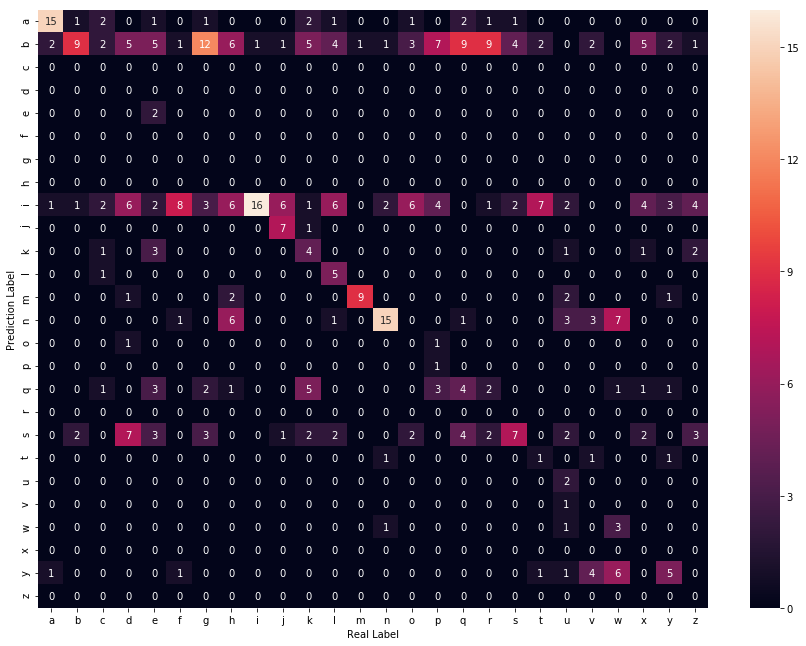

In [85]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "abcdefghijklmnopqrstuvwxyz"],
                  columns = [i for i in "abcdefghijklmnopqrstuvwxyz"])
plt.figure(figsize = (15,11))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()